<a href="https://colab.research.google.com/github/MikhailIurkus/yandex_practicum_project/blob/main/yurkus_mihail_prodazha_kvartir_SPb_proekt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Описание проекта

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных

 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах (м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении

# Шаг 1. Откройте таблицу и изучите общую информацию о данных

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv')

[Ссылка на таблицу](https://drive.google.com/file/d/11GQzBnZhH1USL5wWWhtH5I2-cEjjTpxW/view?usp=sharing)


In [ ]:
display(data.head(5))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


все плохо. нужно читать файл с использованием разделитей

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-info">
<b>Комментарий:</b>
<br>так лучше. 

Исходный датасет я не буду трогать

Создам датасет для работы

</div>


In [ ]:
df = data

### Дубликаты

In [ ]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


# Шаг 2.  Предобработка данных

## 0. Переименование столбцов

In [ ]:
print('Имена столбцов:')
print()
print(df.columns)

df = df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    }
)
print()
print('Переименованный вариант:')
print()
df.columns

Имена столбцов:

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименованный вариант:



Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Добавлю в df столбец с унифицированными названиями

In [ ]:
print('До обработки:    ', df['locality_name'].unique())

df['locality_name_unify'] = df['locality_name'].str.lower()
df['locality_name_unify'] = df['locality_name_unify'].replace(['поселок ',
                                                               'посёлок ',
                                                               'деревня ',
                                                               'городской ',
                                                               'городского типа ',
                                                               'коттеджный ',
                                                               'садовое товарищество '], '', regex=True)
print()
print('после обработки:    ', df['locality_name_unify'].unique())

До обработки:     ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 

## 1. Определите и изучите пропущенные значения:
- Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.

 - Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.

 - Укажите причины, которые могли привести к пропускам в данных.

In [ ]:
print('Число пропусков в столбце с балконами до замены NaN:',df['balcony'].isna().sum())
df['balcony'] = df['balcony'].fillna(0)
print('Число пропусков в столбце с балконами после замены NaN:',df['balcony'].isna().sum())

Число пропусков в столбце с балконами до замены NaN: 11519
Число пропусков в столбце с балконами после замены NaN: 0




---


- ceiling_height (высота потолков)
- living_area (жилая площадь в квадратных метрах)

есть пропущенные значения и значения, которые вызывают сомнения. 

Менять пока ничего буду, так пока не вижу какой-то закономерности


---


- kitchen_area (площадь кухни в квадратных метрах)

есть пропуски и значения, которые вызывают сомнения
все квартиры с указанными площадьми кухонь не имеют свободной планировки


---


- locality_name (название населённого пункта)

тут с пропусками ничего не сделать.


---


- days_exposition (сколько дней было размещено объявление)

В этом столбце пропуски буду интерпритировать как обозначение того, объявление еще актуально. 


---


Пропуски в столбцах хранящие сведения с расстоянием до разных объектов предлагаю не трогать. 

### Дубликаты

In [ ]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


## 2. Приведите данные к нужным типам:

 - Поясните, в каких столбцах нужно изменить тип данных и почему.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

 - is_apartment булев тип
 - floors_total в int
 - first_day_exposition в формат времени
 - balcony в int


In [ ]:
# меняю тип данных в is_apartment (апартаменты) на bool

df['is_apartment'] = df['is_apartment'].astype('bool')

## 3. Замена пропущенных значений

### floors_total (всего этажей в доме)

Есть гипотеза: 

В столбце floors_total (этажность дома) строки с пропущенными значениями - это сигнал, того, что дом одноэтажный.

In [ ]:
# # floors_total (всего этажей в доме)

# print('Уникальные значения в столбце floors_total:', df['floors_total'].unique())
# print()
# print('Количество пропущенных значений:', df['floors_total'].isna().sum())
# print()

# # Можно менять тип данных в этом столбце, но есть 86 NaN
# # не получается посмотреть строки с nan поэтому заменю их на 0 (такого значения этажности ранее не было)

# df['floors_total'] = df['floors_total'].fillna('0').astype('int')

# # замена пропущенных значений в этажности дома на этаж квартиры (просто попробовал реализовать)

# #df['floors_total'] = df['floors_total'].fillna(df['floor']).astype('int')

# print('Количество пропущенных значений после замены NaN:', df['floors_total'].isna().sum())
# print()
# df.query('floors_total == 0').head()

Гипотеза не подтвердилась.

В столбце floor (этаж квартиры) разные значения ⇒ дома не одноэтажные

### first_day_exposition (дата публикации)

In [ ]:
# first_day_exposition (дата публикации)

df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'],
    format='%Y-%m-%dT%H:%M:%S'
    )

### balcony (количество балконов)

In [ ]:
# balcony (количество балконов)

df['balcony'] = df['balcony'].astype('int')

### ceiling_height (высота потолков)

попробую заменить высоту потолков опираясь я на количество этажей. 

Идея в том, что многие дома типовые и если совпадает сгруппировать дома по общей этажности, то и высота потолков в этой квартире одинаковая. 

Конечно, нужно помнить про то, что высота потолков зависит от ремонта и заполнение пропущенных значений медианой - это весьма сомнительный способ избавиться от пропусков.

In [ ]:
print('Количество пропусков до:', df['ceiling_height'].isna().sum())

df['ceiling_height'] = df['ceiling_height'].fillna(
    df.groupby('floors_total')
    ['ceiling_height']
    .transform('median')
    )

print()
print('Количество пропусков после:', df['ceiling_height'].isna().sum())
#sns.scatterplot(data=df, x='ceiling_height', y='floors_total')

Количество пропусков до: 9195

Количество пропусков после: 78


# Шаг 3. Посчитайте и добавьте в таблицу


### цена квадратного метра

In [ ]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(1)

### день недели, месяц и год публикации объявления

In [ ]:
df['day_week'] = df['first_day_exposition'].dt.day_name()

In [ ]:
df['month'] = df['first_day_exposition'].dt.month_name()

In [ ]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

### этаж квартиры; варианты — первый, последний, другой

In [ ]:
def apartment_floor(row):
  floors = row['floor']
  maximum = row['floors_total']

  if 1 == floors:
    return 'первый'
  
  if floors == maximum:
    return 'последний'

  return 'другой'

df['apartment_floor'] = df.apply(apartment_floor, axis=1)

### соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
# доля жилой площади

df['share_living_space'] = (df['living_area'] / df['total_area']).round(1)

# доля площади кухни

df['share_kitchen_area'] = ( df['kitchen_area'] / df['total_area']).round(1)

### Изменю порядок столбцов для удобства

In [ ]:
# columns_df = list(df.columns.values)
# print(columns_df)

df = df[
        ['total_images',
 'last_price',
 'price_square_meter',
 'total_area',
 'living_area',
 'kitchen_area',
 'share_living_space',
 'share_kitchen_area',
 'first_day_exposition',
 'day_week',
 'month',
 'year',
 'days_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'floor',
 'apartment_floor',
 'is_apartment',
 'studio',
 'open_plan',
 'balcony',
 'locality_name',
 'locality_name_unify',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest']
 ]

display(df.head(5))

,total_images,last_price,price_square_meter,total_area,living_area,kitchen_area,share_living_space,share_kitchen_area,first_day_exposition,day_week,...,open_plan,balcony,locality_name,locality_name_unify,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
0,20,13000000.0,120370.4,108.0,51.0,25.0,0.5,0.2,2019-03-07,Thursday,...,False,0,Санкт-Петербург,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,7,3350000.0,82920.8,40.4,18.6,11.0,0.5,0.3,2018-12-04,Tuesday,...,False,2,посёлок Шушары,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,10,5196000.0,92785.7,56.0,34.3,8.3,0.6,0.1,2015-08-20,Thursday,...,False,0,Санкт-Петербург,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,0,64900000.0,408176.1,159.0,NaN,NaN,NaN,NaN,2015-07-24,Friday,...,False,0,Санкт-Петербург,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,2,10000000.0,100000.0,100.0,32.0,41.0,0.3,0.4,2018-06-19,Tuesday,...,False,0,Санкт-Петербург,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0


# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

## Изучение параметров: площадь, цена, число комнат, высота потолков

### Площадь total_area

Text(0.5, 1.0, 'Площадь квартир')

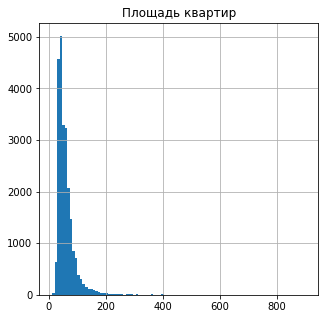

In [ ]:
df['total_area'].hist(
    range=(df['total_area'].min(), df['total_area'].max()),
    bins=100,
    figsize = (5,5)
    )
plt.title('Площадь квартир')

<div class="alert alert-info">
<b>Комментарий:</b>
<br>посмотрю детальнее квартиры с диапазоном площади до 200 метров
</div>

<AxesSubplot:>

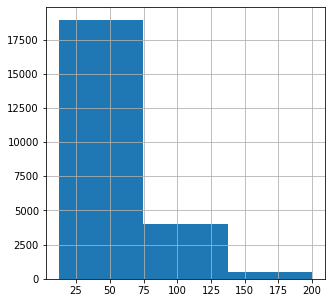

In [ ]:
df['total_area'].hist(range=(df['total_area'].min(), 200), bins=3, figsize = (5,5))

In [ ]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Вывод: 
- основная масса квартир имеет площадь до 140 квадратных метров. 
- больше всего квартир выставленных на продажу имеют площадь от 10 до 75 кв. метров

### Цена last_price

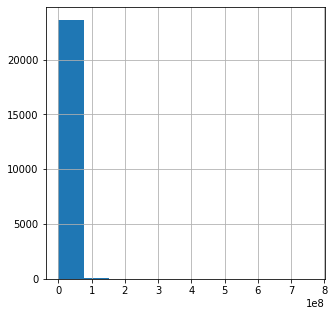

In [ ]:
df['last_price'].hist(
    range=(df['last_price'].min(), df['last_price'].max()),
    figsize = (5,5)
    )
plt.show()

Очень много околонулевых значений - это странно

<AxesSubplot:>

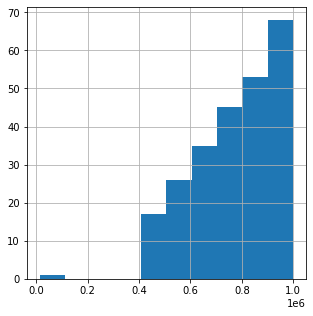

In [ ]:
df['last_price'].hist(
    range=(df['last_price'].min(), 1000000),
    figsize = (5,5)
    )

<AxesSubplot:>

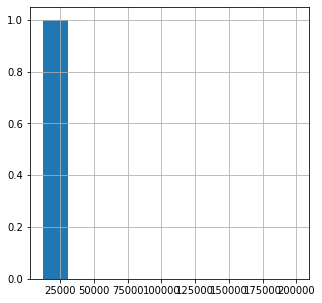

In [ ]:
df['last_price'].hist(
    range=(df['last_price'].min(), 200000),
    figsize = (5,5)
    )

одна квартиира имеет очень странную цену

In [ ]:
df.query('0 < last_price < 50000')

,total_images,last_price,price_square_meter,total_area,living_area,kitchen_area,share_living_space,share_kitchen_area,first_day_exposition,day_week,...,open_plan,balcony,locality_name,locality_name_unify,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
8793,7,12190.0,111.8,109.0,32.0,40.5,0.3,0.4,2019-03-20,Wednesday,...,False,0,Санкт-Петербург,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN


<div class="alert alert-info">
<b>Комментарий:</b>
<br>Это аппартаменты, которые продали всего за 8 дней. За 12190 - не удивительно. 
Ценник в этом объявлении - ошибка, которая не похожа на что-то системное.

В дальнейшем анализе я не буду брать во внимание эти аппартаменты.
</div>

<AxesSubplot:>

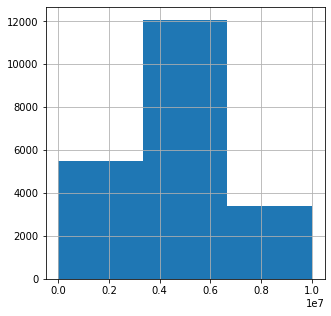

In [ ]:
df['last_price'].hist(
    range=(12200, 10000000),
    figsize = (5,5),
    bins=3
    )

Продолжу работу с 3мя корзинами
- больше всего недвижимости со стоимостью от 2,5 до 6 млн. рублей


---


- второе место по объему рынка занимает недвижимость с диапазоном цент от 350 тысяч до 6,5 млн. рублей

  Этот сегмент скорее всего надо смотреть подробнее, так как слишком большой разбег по ценам. 


---


- меньше всего недвижимости с ценой от 7 до 10 млн. рублей

In [ ]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

### Число комнат rooms

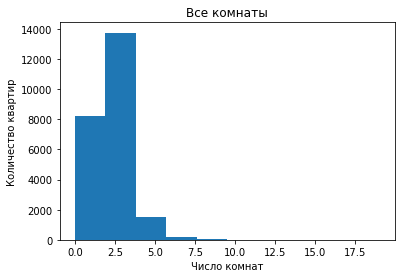

На гистограмме мы видим, что наибольшая количество квартир выставленных на продажу имеет от 1ой до 6 комнат


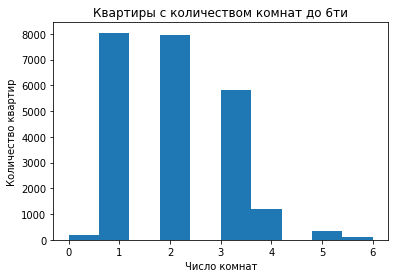

При болле детальном рассмотрении аналитик Миша увидел квартиры, которые не имеют комнат.
Ими я займусь ниже.
А пока вернемся к строчкам с нормальными данными и посмотрим на однушки, двушки, трешки и царские четырехкомнатные квартиры


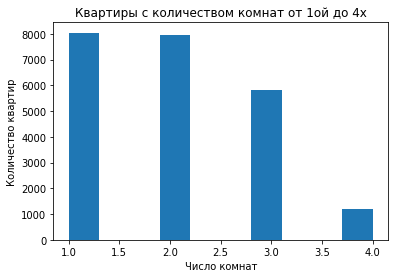

больше всего однокомнатных квартир
практически столько же двухкомнатных
чуть меньше 6000 трехкомнтаных квартир
около 1000 объявлений о продаже 4х комнатных квартир


In [ ]:
plt.hist(
    df['rooms'],
    range=(df['rooms'].min(), df['rooms'].max()),
    bins=10
    )

plt.title('Все комнаты')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()

print('На гистограмме мы видим, что наибольшая количество квартир выставленных на продажу имеет от 1ой до 6 комнат')

plt.hist(
    df['rooms'],
    range=(df['rooms'].min(),6),
    bins=10
    )

plt.title('Квартиры с количеством комнат до 6ти')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()

print('При болле детальном рассмотрении аналитик Миша увидел квартиры, которые не имеют комнат.\nИми я займусь ниже.\nА пока вернемся к строчкам с нормальными данными и посмотрим на однушки, двушки, трешки и царские четырехкомнатные квартиры')

plt.hist(
    df['rooms'],
    range=(1,4),
    )

plt.title('Квартиры с количеством комнат от 1ой до 4х')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()

print('больше всего однокомнатных квартир\nпрактически столько же двухкомнатных\nчуть меньше 6000 трехкомнтаных квартир\nоколо 1000 объявлений о продаже 4х комнатных квартир')

In [ ]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

### Высота потолков ceiling_height

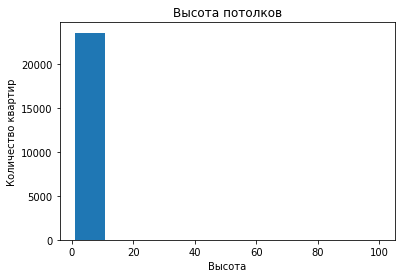

На графике видно, что в мы очень хорошо поработали с пропусками в этом столбце.
Практически все квартиры имеют высоту потолков до 10 метров



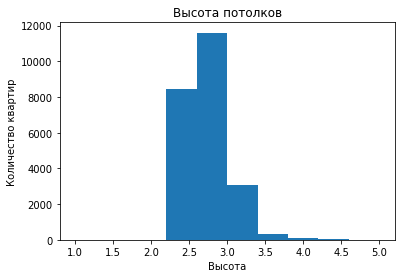

Большая часть квартир имеет высоту от 2,5 до 3 метров


In [ ]:
plt.hist(
    df['ceiling_height'],
    range=(df['ceiling_height'].min(), df['ceiling_height'].max()),
    bins=10
    )

plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()
print('На графике видно, что в мы очень хорошо поработали с пропусками в этом столбце.\nПрактически все квартиры имеют высоту потолков до 10 метров')

print()
plt.hist(
    df['ceiling_height'],
    range=(df['ceiling_height'].min(), 5),
    bins=10
    )

plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()
print('Большая часть квартир имеет высоту от 2,5 до 3 метров')

In [ ]:
df['ceiling_height'].describe()

count    23621.000000
mean         2.735933
std          0.995903
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

### Изучите время продажи квартиры days_exposition

Постройте гистограмму.

Посчитайте среднее и медиану.

Опишите, сколько обычно занимает продажа.

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

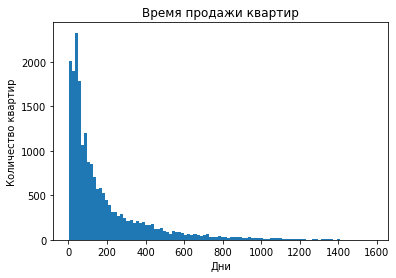

Гистограмма выглядит вполне логично 
Большинство квартир продается в первый год


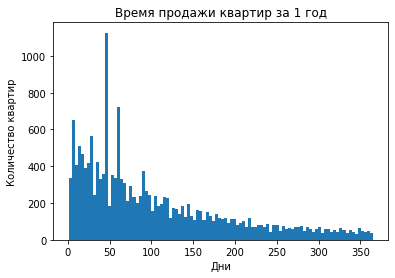

При более детальном рассмотрении видно, что основная масса квартир 
продается за 150 дней 
Вызывают вопросы очень быстрые и медленные сделки


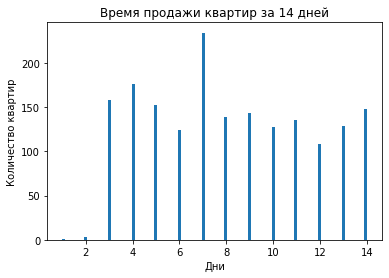

Околонулевые значения я не буду интерпретировать как аномалия,
так как столбец days_exposition - срок размещения объявления 
Мы знаем, что покупка квартиры - это длительный процесс, 
однако, есть возможность того, что покупатель как-то договаривается с продавцом (вносит предоплату) 
и продавец убирает объявление из агрегатора



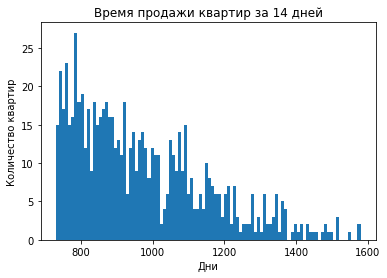

В среднем объявление исчезают через 180 дней с момента публикации 
Примеро 50% объявлений снимают с публикации через 95 дней - это медиана для данного столбца

Причин для долгих продаж может быть много.
Завышенная или слишком низкая стоимость, которая отталкивает покупателей,
плохой ремонт и остуствие инфроструктуры,
удаленность - любой из этих факторов будет влиять на скорость продажи квартиры


In [ ]:
plt.hist(
    df['days_exposition'],
    range=(df['days_exposition'].min(), df['days_exposition'].max()),
    bins=100
    )

plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

print('Гистограмма выглядит вполне логично \nБольшинство квартир продается в первый год')

plt.hist(
    df['days_exposition'],
    range=(df['days_exposition'].min(), 365),
    bins=100
    )

plt.title('Время продажи квартир за 1 год')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
print('При более детальном рассмотрении видно, что основная масса квартир \nпродается за 150 дней \nВызывают вопросы очень быстрые и медленные сделки')

plt.hist(
    df['days_exposition'],
    range=(df['days_exposition'].min(), 14),
    bins=100
    )

plt.title('Время продажи квартир за 14 дней')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

print('Околонулевые значения я не буду интерпретировать как аномалия,\nтак как столбец days_exposition - срок размещения объявления \nМы знаем, что покупка квартиры - это длительный процесс, \nоднако, есть возможность того, что покупатель как-то договаривается с продавцом (вносит предоплату) \nи продавец убирает объявление из агрегатора')
print()

plt.hist(
    df['days_exposition'],
    range=(730, df['days_exposition'].max()),
    bins=100
    )

plt.title('Время продажи квартир за 14 дней')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

print('В среднем объявление исчезают через 180 дней с момента публикации \nПримеро 50% объявлений снимают с публикации через 95 дней - это медиана для данного столбца')
print()
df['days_exposition'].describe()

print('Причин для долгих продаж может быть много.\nЗавышенная или слишком низкая стоимость, которая отталкивает покупателей,\nплохой ремонт и остуствие инфроструктуры,\nудаленность - любой из этих факторов будет влиять на скорость продажи квартиры')

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Вижу очень большой разброс значений в столбце цены квартиры


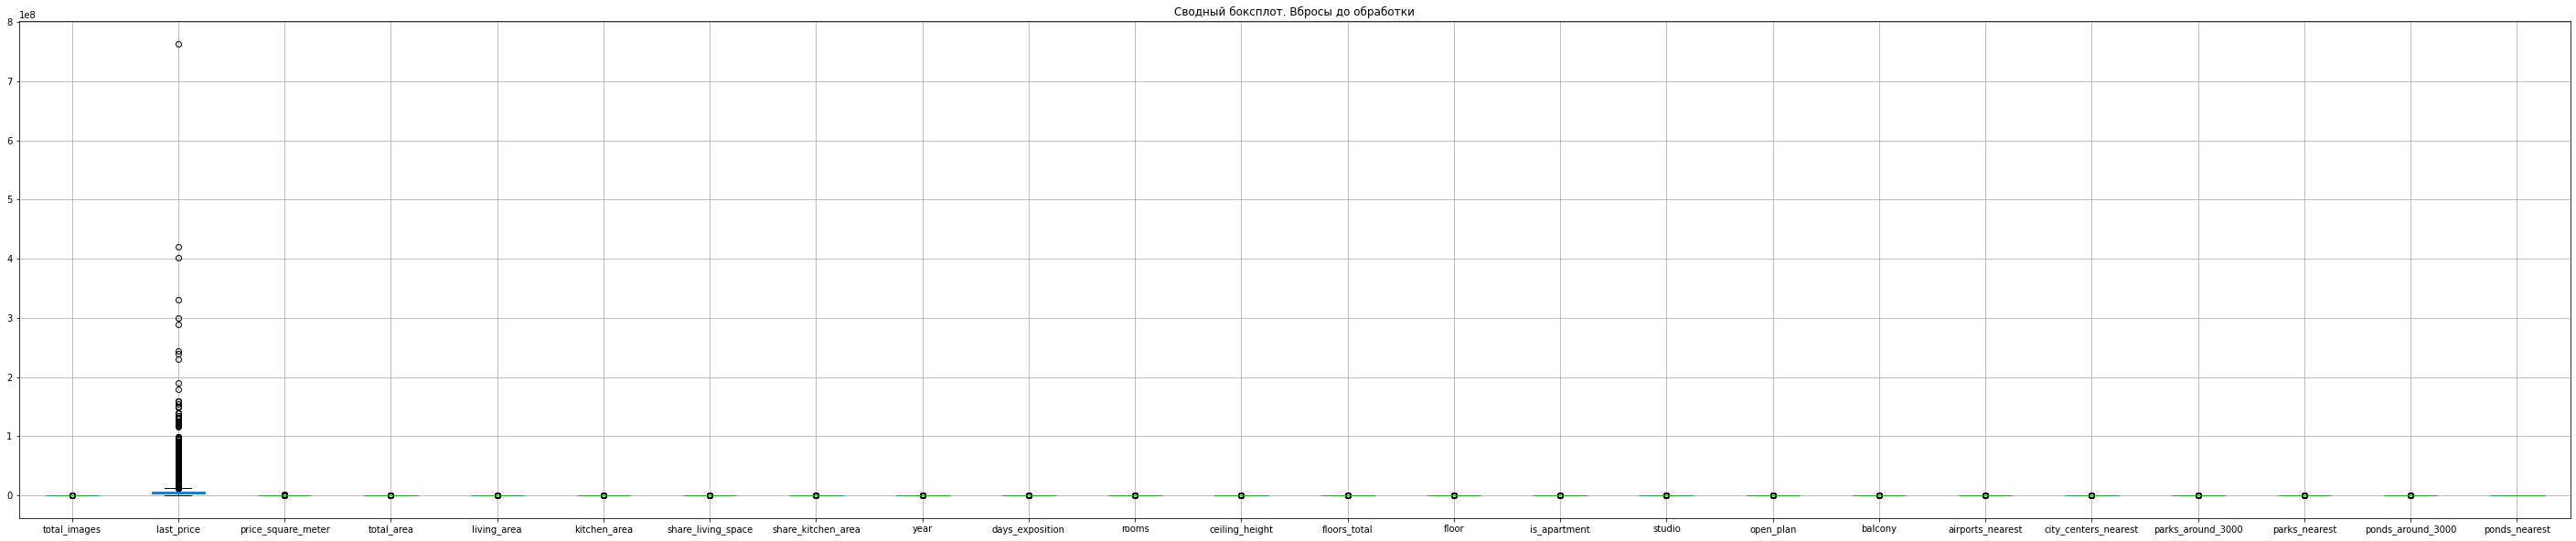

In [ ]:
df.boxplot(figsize=(50,10))
plt.title('Сводный боксплот. Вбросы до обработки')
print('Вижу очень большой разброс значений в столбце цены квартиры')

<AxesSubplot:>

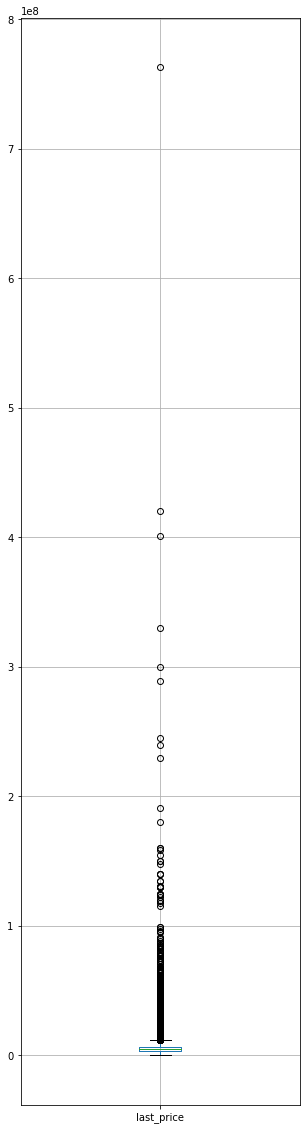

In [ ]:
df.boxplot('last_price', figsize=(5,20))

In [ ]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Все, что лежит за q3(75%) буду считать выбросом. И их очень много
</div>

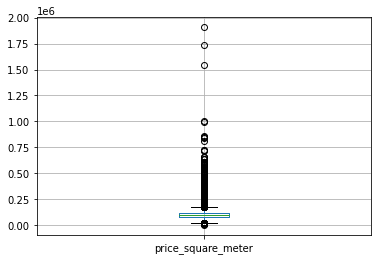

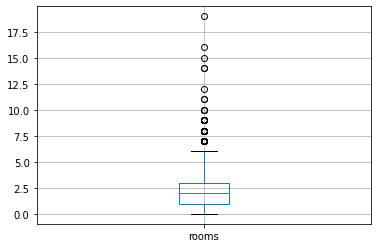

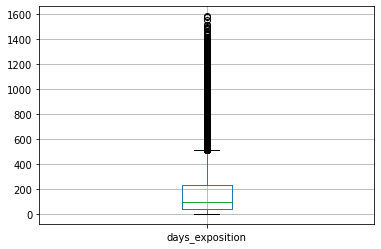

In [ ]:
# делаю вывод, что и в остальных боксплотах картинка +- будет такой же на общем яшике с ящиками 
df.boxplot('price_square_meter')
plt.show()
print()
df.boxplot('rooms')
plt.show()
print()
df.boxplot('days_exposition')
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Все эти вбросы нужно отфильтровать
</div>

### Убираем вбросы

In [ ]:
q1 = df['total_area'].quantile(.25) # записываю в переменную первый квантиль
q3 = df['total_area'].quantile(.75) # записываю в переменную третий квантиль

df_query = df.query('@q1 <= total_area <= @q3') # площадь

q1 = df['last_price'].quantile(.25)
q3 = df['last_price'].quantile(.75)

df_query = df.query('@q1 <= last_price <= @q3') # цена общая

q1 = df['price_square_meter'].quantile(.25)
q3 = df['price_square_meter'].quantile(.75)

df_query = df_query.query('@q1 <= price_square_meter <= @q3') # цена кв. метр

q1 = df['rooms'].quantile(.25)
q3 = df['rooms'].quantile(.75)

df_query = df_query.query('@q1 <= rooms <= @q3') # комнаты

q1 = df['ceiling_height'].quantile(.25)
q3 = df['ceiling_height'].quantile(.75)

df_query = df_query.query('@q1 <= ceiling_height <= @q3') # высота потолков

q1 = df['days_exposition'].quantile(.25)
q3 = df['days_exposition'].quantile(.75)

df_query = df_query.query('@q1 <= days_exposition <= @q3') # срок продажи

### Проверю как изменились гистограммы и распределение

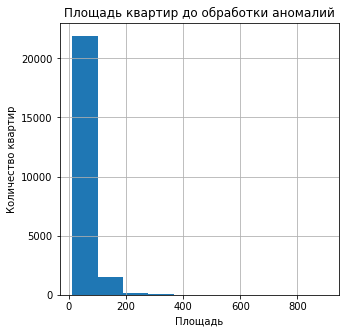

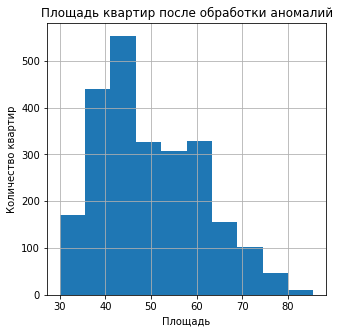

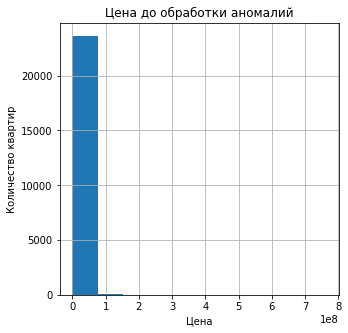

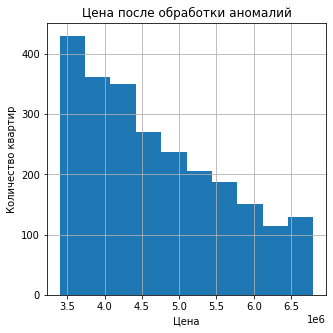

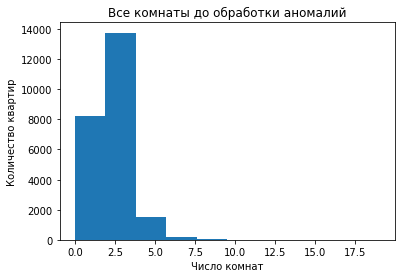

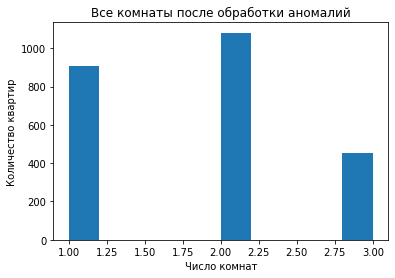

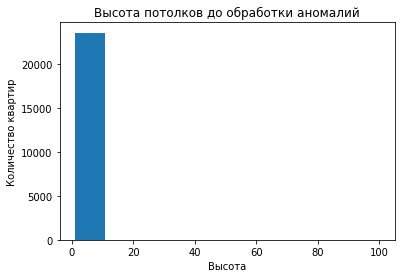

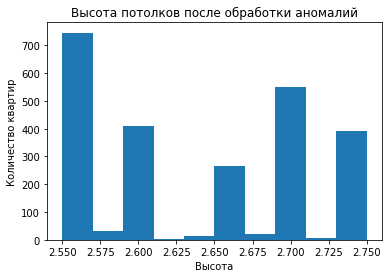

In [ ]:
df['total_area'].hist(
    range=(df['total_area'].min(), df['total_area'].max()),
    figsize = (5,5),
    )
plt.title('Площадь квартир до обработки аномалий')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()
print()
df_query['total_area'].hist(
    range=(df_query['total_area'].min(), df_query['total_area'].max()),
    figsize = (5,5)
    )
plt.title('Площадь квартир после обработки аномалий')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()
print()
print()

df['last_price'].hist(
    range=(df['last_price'].min(), df['last_price'].max()),
    figsize = (5,5)
    )
plt.title('Цена до обработки аномалий')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print()
df_query['last_price'].hist(
    range=(df_query['last_price'].min(), df_query['last_price'].max()),
    figsize = (5,5)
    )
plt.title('Цена после обработки аномалий')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print()
print()

plt.hist(
    df['rooms'],
    range=(df['rooms'].min(), df['rooms'].max())
    )
plt.title('Все комнаты до обработки аномалий')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()
print()
plt.hist(
    df_query['rooms'],
    range=(df_query['rooms'].min(), df_query['rooms'].max())
    )
plt.title('Все комнаты после обработки аномалий')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()
print()
print()

plt.hist(
    df['ceiling_height'],
    range=(df['ceiling_height'].min(), df['ceiling_height'].max())
    )
plt.title('Высота потолков до обработки аномалий')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()
print()
plt.hist(
    df_query['ceiling_height'],
    range=(df_query['ceiling_height'].min(), df_query['ceiling_height'].max())
    )

plt.title('Высота потолков после обработки аномалий')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()

#### проверю boxplot

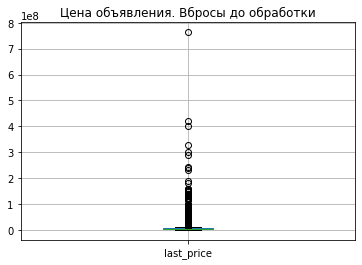

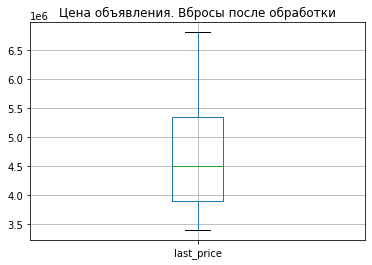

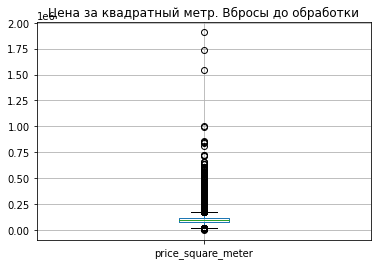

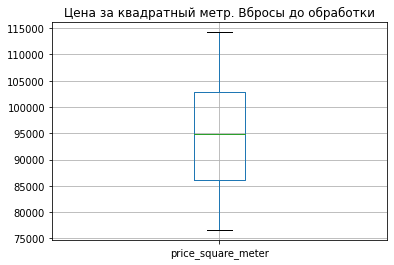

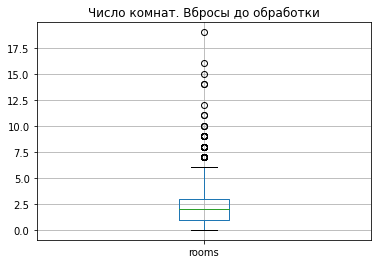

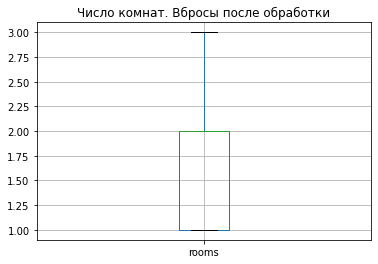

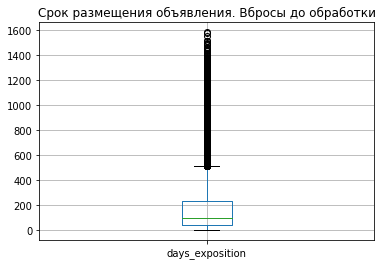

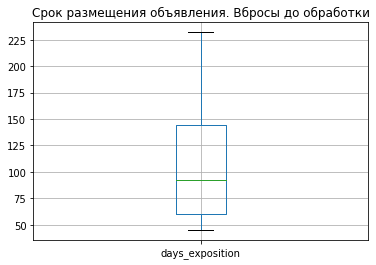

In [ ]:
df.boxplot('last_price')
plt.title('Цена объявления. Вбросы до обработки')
plt.show()
print()
df_query.boxplot('last_price')
plt.title('Цена объявления. Вбросы после обработки')
plt.show()
print()
print()


df.boxplot('price_square_meter')
plt.title('Цена за квадратный метр. Вбросы до обработки')
plt.show()
print()
df_query.boxplot('price_square_meter')
plt.title('Цена за квадратный метр. Вбросы до обработки')
plt.show()
print()
print()


df.boxplot('rooms')
plt.title('Число комнат. Вбросы до обработки')
plt.show()
print()
df_query.boxplot('rooms')
plt.title('Число комнат. Вбросы после обработки')
plt.show()
print()
print()


df.boxplot('days_exposition')
plt.title('Срок размещения объявления. Вбросы до обработки')
plt.show()
print()
df_query.boxplot('days_exposition')
plt.title('Срок размещения объявления. Вбросы до обработки')
plt.show()
print()
print()

Text(0.5, 1.0, 'Сводный боксплот. Вбросы после обработки')

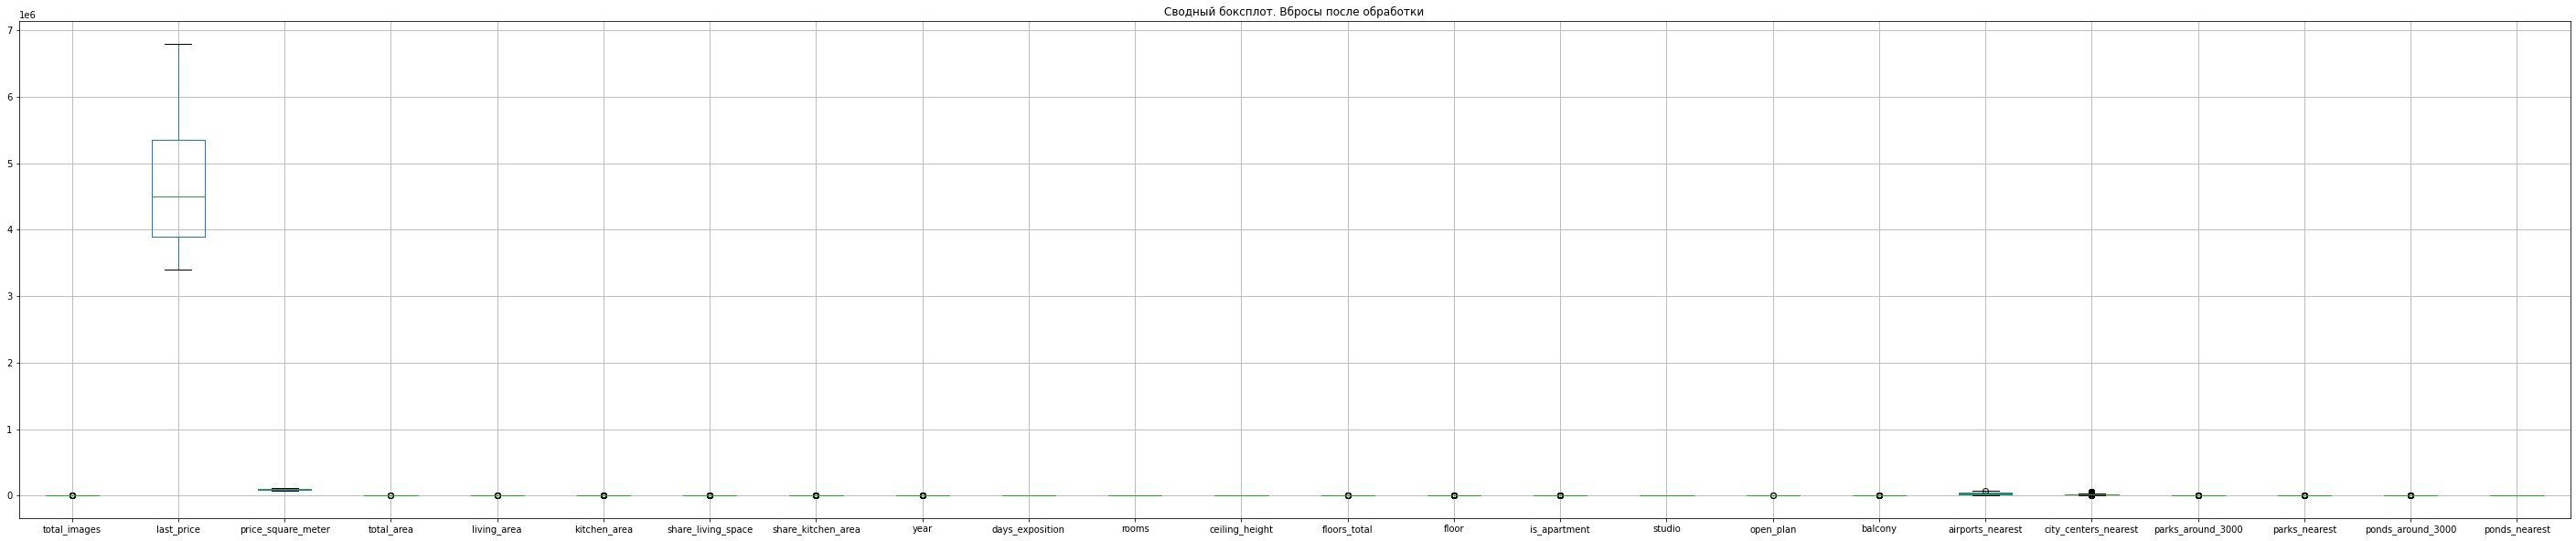

In [ ]:
df_query.boxplot(figsize=(50,10))
plt.title('Сводный боксплот. Вбросы после обработки')

<div class="alert alert-info">
<b>Комментарий:</b>
<br>И с усами нет проблем! кайф
</div>

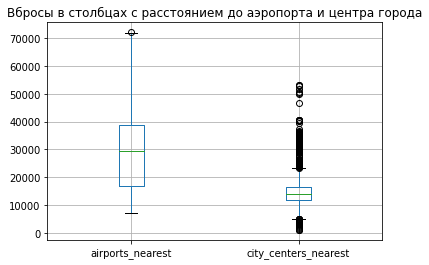

In [ ]:
df_query.boxplot(['airports_nearest', 'city_centers_nearest'])
plt.title('Вбросы в столбцах с расстоянием до аэропорта и центра города')
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b>
<br>В столбцах ['airports_nearest', 'city_centers_nearest'] считаю, что пользоваться боксплотом не нужно, так как недвижимость находится не только в пределах города, но и  области. Вбросы в этих столбцах - норма. Аномальных значений я не обнаружил
</div>

## Какие факторы больше всего влияют на стоимость квартиры? 

### Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

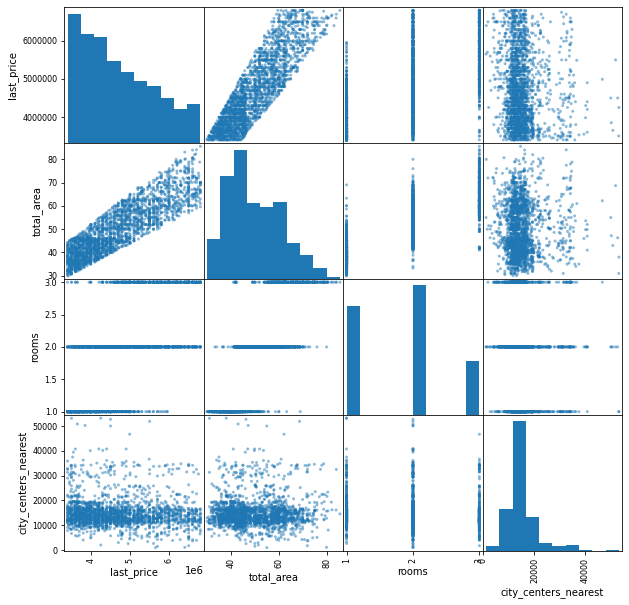

In [ ]:
pd.plotting.scatter_matrix(df_query.loc[:, ['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(10, 10))

<div class="alert alert-info">
<b>Комментарий:</b>
<br>мне не нравится читать такие большие матрицы.

Посмотрю подробнее
</div>

            last_price  total_area
last_price      1.0000      0.8715
total_area      0.8715      1.0000


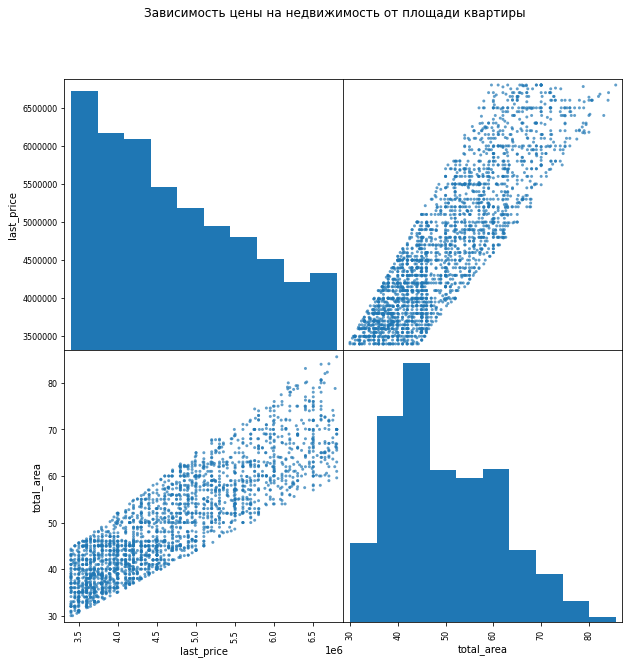

In [ ]:
print(df_query.loc[:, ['last_price', 'total_area']].corr())
pd.plotting.scatter_matrix(
    df_query.loc[:, ['last_price', 'total_area']],
    figsize=(10, 10),
    alpha=0.7,
    grid=False
    )

plt.suptitle('Зависимость цены на недвижимость от площади квартиры')
plt.show()

- Верхняя левая диаграмма - связь цены с ценой.

Эта гистограмма распределения по цене. 

Видно, что больше всего квартир стоимостью выше 6,5 млн. рублей. Меньше - квартир стоимостью до 4,5 млн. 

- Нижняя левая диаграмма - диаграмма рассеивания. Показывает связь между ценой и площадью.

Мы видим наибольшую плотность точек у у квартир с площадью от 30 до 45 кв. метров. Стоимость такой недвжимости редко превышает 4,5 млн. 

- Правый верхний график показывает практически то же самое, но оси поменялись местами

- Правый нижний график рассказывает нам о том, что больше всего квартир выставленных на продажу имеют площадь от 40 до 45 квадратных метров


---

из матрицы корреляции мы видим,что коэффициент связи площади и цены квартиры достаточно высокий  = 0,87. 

Чем ближе это значение к единице, тем сильнее зависимость измеряемых параметров друг от друга. 

            last_price     rooms
last_price    1.000000  0.655206
rooms         0.655206  1.000000


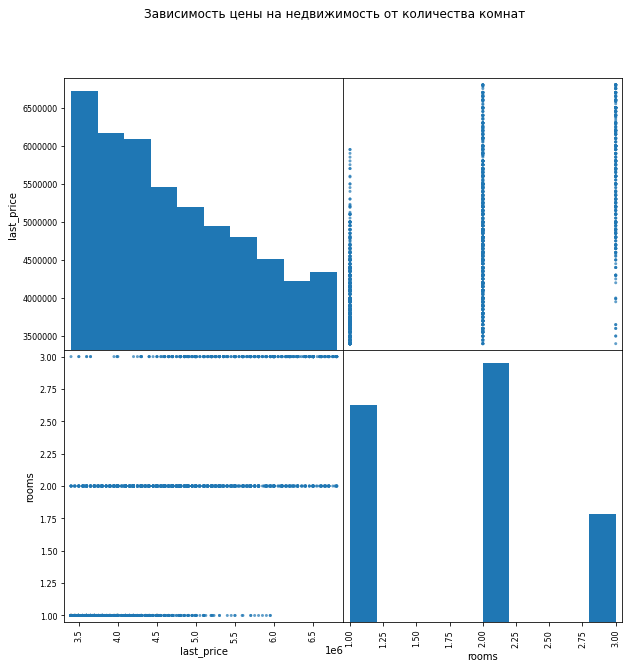

In [ ]:
print(df_query.loc[:, ['last_price', 'rooms']].corr())
pd.plotting.scatter_matrix(
    df_query.loc[:, ['last_price', 'rooms']],
    figsize=(10, 10),
    alpha=0.7,
    grid=False
    )

plt.suptitle('Зависимость цены на недвижимость от количества комнат')
plt.show()

- Верхняя левая диаграмма

Эта гистограмма распределения по цене. 

Видно, что больше всего квартир стоимостью выше 6,5 млн. рублей. Меньше - квартир стоимостью до 4,5 млн. 

- Нижняя левая диаграмма - диаграмма рассеивания. Показывает связь между ценой и количеством комнат.

Однушки в основной массе имеют цену до 5 млн. рублей, но есть варианты и до 6 млн

Двухкомнатные квартиры можно найти как за 3,5 так и практически за 7 млн. рублей. Выбор во всем диапазоне равномерный

Сложно, но можно найти трехкомнатную квартиру за 3,5 млн.
Основная масса квартир с тремя комнатами стартует от 4,5 млн. рублей

- Правый нижний график рассказывает нам о том, что больше всего квартир 
с двумя комнатами.


---

из матрицы корреляции мы видим,что коэффициент связи количества комнат и  цены квартиры = 0,66. Связь есть, но не очень сильная.

                      last_price  city_centers_nearest
last_price              1.000000             -0.080923
city_centers_nearest   -0.080923              1.000000


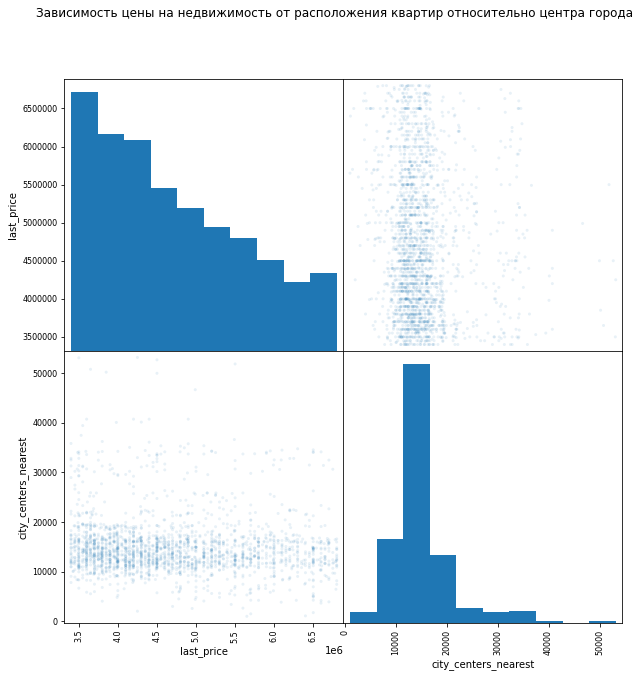

In [ ]:
print(df_query.loc[:, ['last_price', 'city_centers_nearest']].corr())
pd.plotting.scatter_matrix(
    df_query.loc[:, ['last_price', 'city_centers_nearest']],
    figsize=(10, 10),
    alpha=0.1,
    grid=False
    )

plt.suptitle('Зависимость цены на недвижимость от расположения квартир относительно центра города')
plt.show()

- Нижняя левая диаграмма

Плотность точек наибольшая у квартир, которые стоят о 5 млн. рублей и находятся на расстояни от 10 до 20 км от центра города. Скорее всего - это спальные районы.

- Правый нижний график рассказывает нам о том, что больше всего квартир 
выставленных на продажу удалены от центра на 10 - 15 км.


---

из матрицы корреляции мы видим,что коэффициент связи расположения квартир относительно центра города и  цены квартиры = - 0,08. Связь слабая.

In [ ]:
print(df_query.loc[:, ['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr())

                      last_price  total_area     rooms  city_centers_nearest
last_price              1.000000    0.871500  0.655206             -0.080923
total_area              0.871500    1.000000  0.810509              0.008953
rooms                   0.655206    0.810509  1.000000             -0.046496
city_centers_nearest   -0.080923    0.008953 -0.046496              1.000000


<div class="alert alert-info">
<b>Комментарий:</b>
<br>Наибольшая зависимость между ценой и площадью (0,87)

Наименьшая зависимость между расстоянием до центра и площадью квартиры (0,009)
</div>


### Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

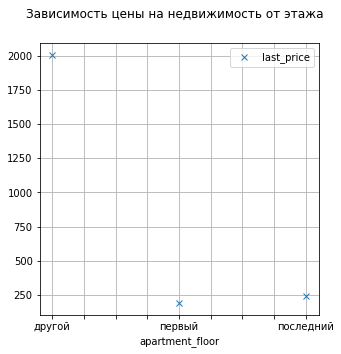

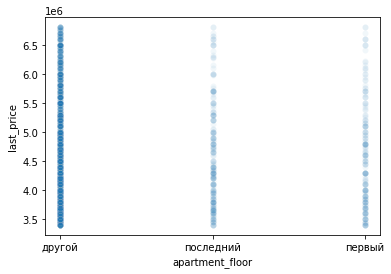

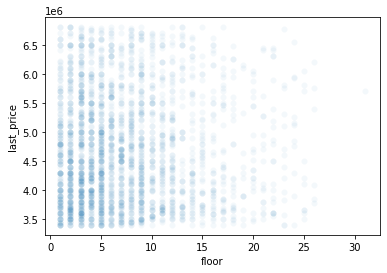

In [ ]:
(
    df_query.pivot_table(index='apartment_floor', values='last_price', aggfunc='count').plot(
        grid=True,
        style='x',
        figsize=(5, 5)
        )
    )
plt.suptitle('Зависимость цены на недвижимость от этажа')
plt.show()
print()
sns.scatterplot(data=df_query, x='apartment_floor', y='last_price', alpha=0.06)
plt.show()
print()
sns.scatterplot(data=df_query, x='floor', y='last_price', alpha=0.05)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b>
<br>на визуализации видно, что больше квартир на другом этаже (от 1го до 5го)
</div>


In [ ]:
df_query.pivot_table(index='apartment_floor', values='last_price', aggfunc='corr')

,,last_price
apartment_floor,,
другой,last_price,1.0
первый,last_price,1.0
последний,last_price,1.0


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Подумай, можно ли говорить о применение корреляции к этажности? Ведь цена от этажа зависит не линейно


### Изучите зависимость цены от даты размещения: дня недели, месяца и года.

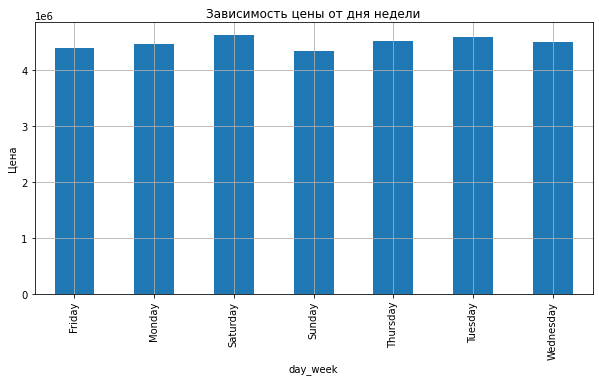

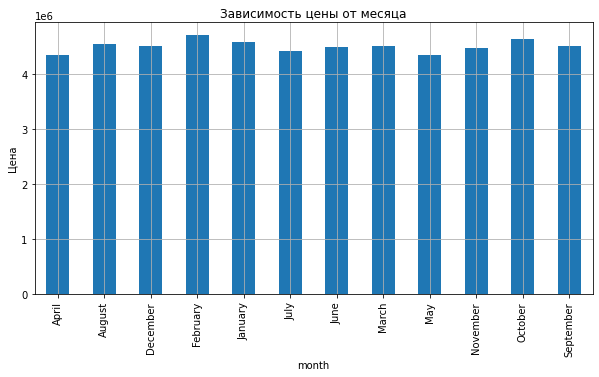

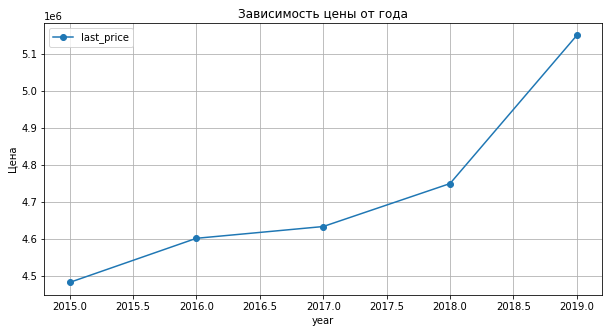

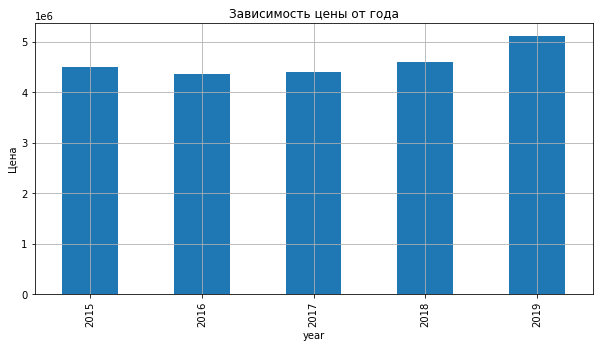


            last_price     year
last_price     1.00000  0.08959
year           0.08959  1.00000


In [ ]:
df_query.groupby(['day_week'])['last_price'].median().plot(grid=True, figsize=(10, 5), kind='bar')
plt.title('Зависимость цены от дня недели')
plt.ylabel('Цена')
plt.show()
print()

df_query.groupby(['month'])['last_price'].median().plot(grid=True, figsize=(10, 5), kind='bar')
plt.title('Зависимость цены от месяца')
plt.ylabel('Цена')
plt.show()
print()

(
    df_query.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены от года')
plt.ylabel('Цена')
plt.show()
print()

df_query.groupby(['year'])['last_price'].median().plot(grid=True, figsize=(10, 5), kind='bar')
plt.title('Зависимость цены от года')
plt.ylabel('Цена')
plt.show()
print()
print(df_query.loc[:, ['last_price', 'year']].corr())

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Есть зависимость только от года. С каждым годом растет цена (но не сильно)
</div>


### В какой день. год и месяц было больше продаж

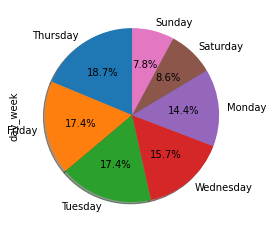

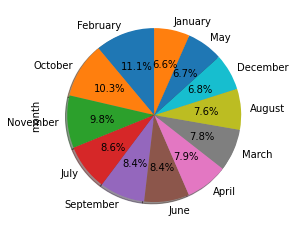

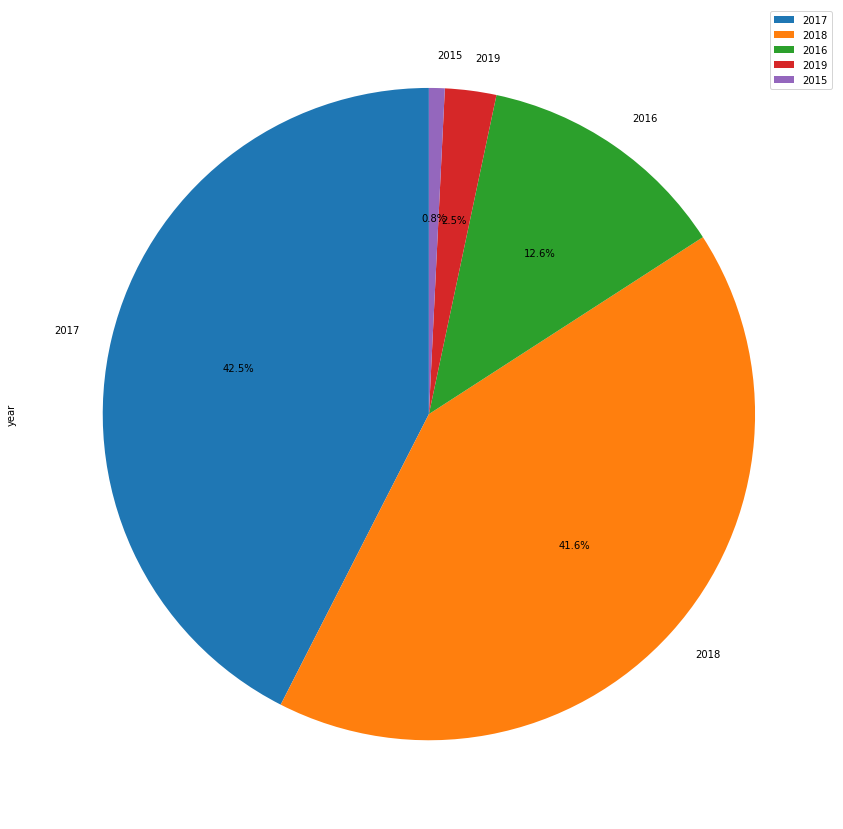

In [ ]:
df_query['day_week'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print()
df_query['month'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print()
df_query['year'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False, startangle=90, figsize=(15,15))
plt.legend()
plt.show()
print()

### Выберите 10 населённых пунктов с наибольшим числом объявлений. 

Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

Выделите населённые пункты с самой высокой и низкой стоимостью жилья.


In [ ]:
print('Топ 10 городов по количству объявлений:')
print()
print(df_query['locality_name_unify'].value_counts().sort_values(ascending=False).head(10))

Топ 10 городов по количству объявлений:

санкт-петербург    1884
кудрово             125
мурино               93
парголово            84
шушары               55
пушкин               32
петергоф             24
сестрорецк           23
колпино              18
всеволожск           16
Name: locality_name_unify, dtype: int64


In [ ]:
top_locality_query = df_query.pivot_table(
        index='locality_name_unify',
        values='price_square_meter',
        aggfunc='mean'
        )

top_locality_query['price_square_meter'] = top_locality_query['price_square_meter'].round(1)

print(top_locality_query.sort_values(by='price_square_meter', ascending=False))

                     price_square_meter
locality_name_unify                    
ильичёво                       107988.2
зеленогорск                    107312.5
левашово                        96997.7
пушкин                          96615.5
сестрорецк                      96371.9
санкт-петербург                 95804.1
кудрово                         94756.1
парголово                       94207.8
мурино                          90369.7
шушары                          90281.3
стрельна                        90130.9
янино-1                         88839.5
рощино                          88831.1
бугры                           87787.8
петергоф                        87661.3
сосновый бор                    87541.3
кузьмолово                      87115.7
колпино                         84853.9
павловск                        84615.4
ломоносов                       83931.5
всеволожск                      83919.6
металлострой                    83785.3
понтонный                       83333.3


<div class="alert alert-info">
<b>Комментарий:</b>
<br>Самая большая стоимость квадратного метра в Ильичёво, а самая дешевая в п. Тельмана
</div>

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.

Выделите квартиры в Санкт-Петербурге (locality_name).

Ваша задача — выяснить, какая область входит в центр.

Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.

После этого посчитайте среднюю цену для каждого километра.

Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

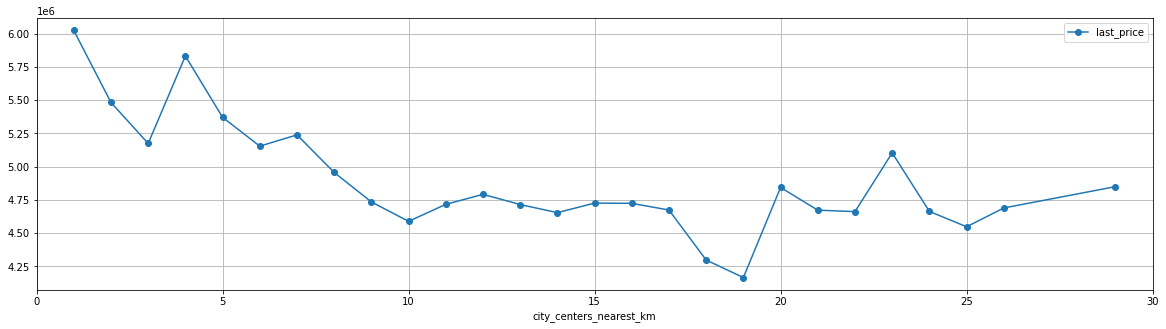

In [ ]:
df_query['city_centers_nearest_km'] = (df_query['city_centers_nearest'] / 1000).round(0)

(
    df_query.query('locality_name_unify == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(20, 5))
)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Центральная зона находится в радиусе 6 км
</div>

## Выделите сегмент квартир в центре.

In [ ]:
piter_centr = df_query.query(('locality_name_unify == "санкт-петербург"') and ('city_centers_nearest_km <= 6'))
#piter_centr.head(5)

### Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

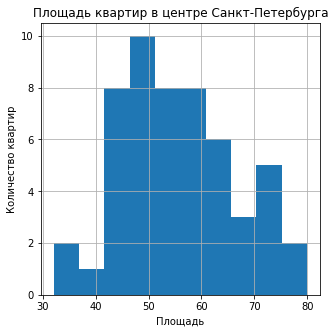

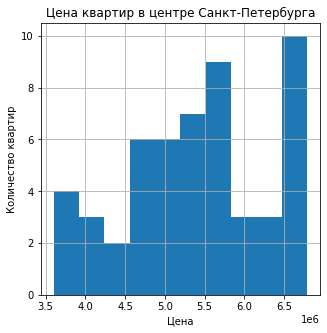

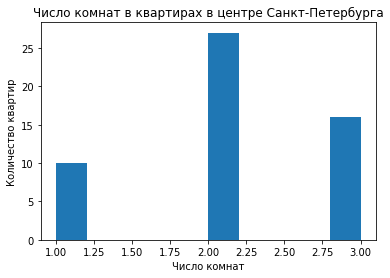

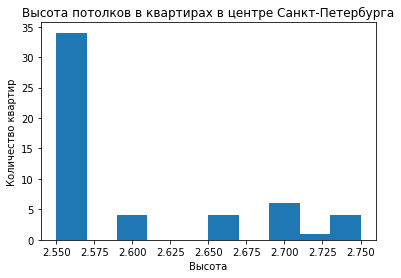

In [ ]:
piter_centr['total_area'].hist(
    range=(piter_centr['total_area'].min(), piter_centr['total_area'].max()),
    figsize = (5,5)
    )
plt.title('Площадь квартир в центре Санкт-Петербурга')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()
print()

piter_centr['last_price'].hist(
    range=(piter_centr['last_price'].min(), piter_centr['last_price'].max()),
    figsize = (5,5)
    )
plt.title('Цена квартир в центре Санкт-Петербурга')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print()

plt.hist(
    piter_centr['rooms'],
    range=(piter_centr['rooms'].min(), piter_centr['rooms'].max())
    )
plt.title('Число комнат в квартирах в центре Санкт-Петербурга')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()
print()

plt.hist(
    piter_centr['ceiling_height'],
    range=(piter_centr['ceiling_height'].min(), piter_centr['ceiling_height'].max())
    )
plt.title('Высота потолков в квартирах в центре Санкт-Петербурга')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()
print()

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Недвижимость в центральной части Санкт-Петербурга:

Площадь квартир варьируется в диапазоне 30 - 80 метров. 
Больше всего квартир с площадью 50 квадратных метров

Цены на недвижимость варьируються от 3,5 до 6,7 млн. рублей

На рынке есть студии, двухкомнатные (их большинство) и трехкомнатные квартиры

Высота потолков в основной массе 2.5 метра. Редко можно встретить квартиры с потолками высотой 2,7 метра
</div>

### Выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Text(0.5, 1.0, 'Корреляция зависимости параметров недвижимости\nCегмент квартир в центре Санкт-Петербурга')

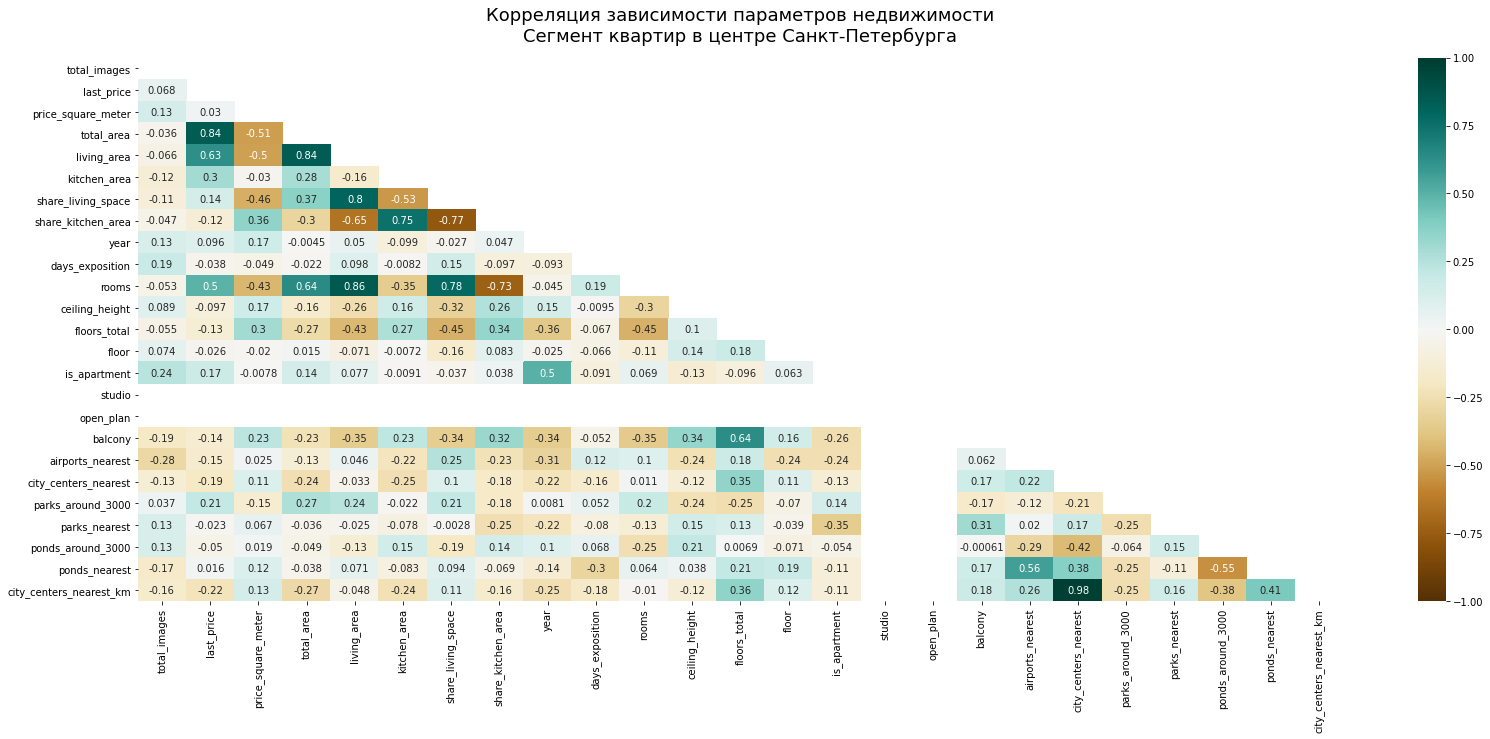

In [ ]:
plt.figure(figsize=(27, 10)) 

mask = np.triu(np.ones_like(piter_centr.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(piter_centr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Корреляция зависимости параметров недвижимости\nCегмент квартир в центре Санкт-Петербурга', fontdict={'fontsize':18}, pad=16)

Расшифровка: 
- 1.0 параметры движутся в одну стороны (прямая или положительная взаимосвязь): либо растут, либо падают.
- 0.9 - 0.5 Зависимость параметров достаточно сильная, с постепенной тенденцией к ослаблению.
- 0.5 - 0.1 Слабая корреляция.
- 0 Отсутствует взаимозависимость.
- -0.1 — -0.5 Слабая корреляция.
- -0.5 - -0.9 Зависимость пар друг от друга нарастает, усиливается движение в разные стороны.
- -1.0 Параметры движутся в разные стороны (зеркальная или отрицательная взаимосвязь): одна растет, другая падает.

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Самая сильная зависимость у жилой площади и количества комнат (спасибо, кэп)

Цена и площадь, высота потолков и этажность дома и многие другие параметры имеют прямую зависимость друг от друга
Если растет один параметр, то растет и другой. 

Интересно наблюдать за отрицательной корреляцией.
Так расходятся данные между жилой площадью и площадью кухни. Они зависят друг от друга. Чем больше одно из значений - тем меньше другое. 
</div>

### Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Text(0.5, 1.0, 'Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области')

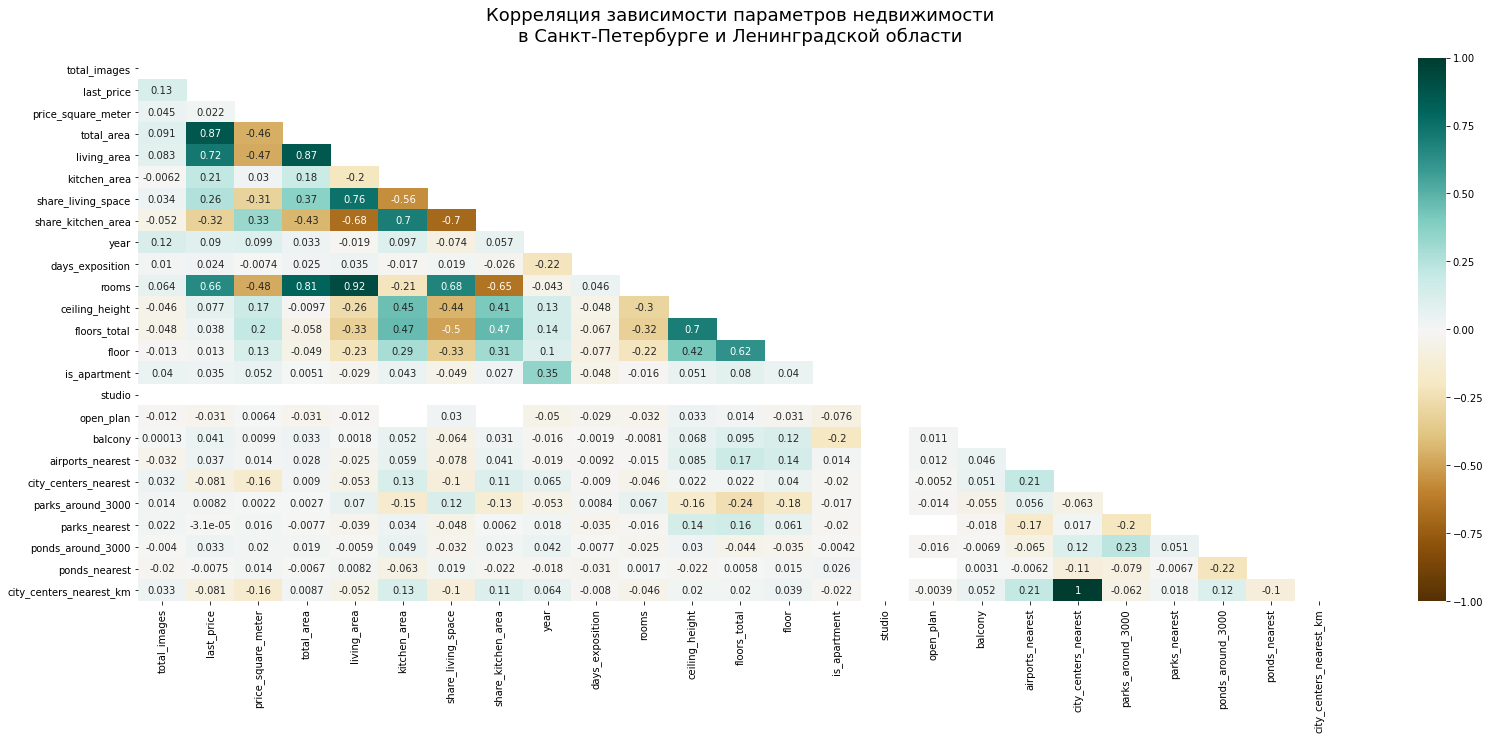

In [ ]:
plt.figure(figsize=(27, 10)) 

mask = np.triu(np.ones_like(df_query.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df_query.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области', fontdict={'fontsize':18}, pad=16)

Расшифровка: 
- 1.0 параметры движутся в одну стороны (прямая или положительная взаимосвязь): либо растут, либо падают.
- 0.9 - 0.5 Зависимость параметров достаточно сильная, с постепенной тенденцией к ослаблению.
- 0.5 - 0.1 Слабая корреляция.
- 0 Отсутствует взаимозависимость.
- -0.1 — -0.5 Слабая корреляция.
- -0.5 - -0.9 Зависимость пар друг от друга нарастает, усиливается движение в разные стороны.
- -1.0 Параметры движутся в разные стороны (зеркальная или отрицательная взаимосвязь): одна растет, другая падает.

<div class="alert alert-info">
<b>Комментарий:</b>
<br>В целом, таблицы корреляции недвижтмости центра Санкт-Петербурга 
и общая таблица корреляции недвижимости СПб и области похожи друг друга.
Связи меняют свою силу, но не критично.
</div>

# Шаг 5 (исправления)

In [ ]:
df_query = df.query(
    'total_area <= 200 & last_price <= 10000000 & rooms < 6 & 2 <= ceiling_height < 5'
    )

### total_area

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64



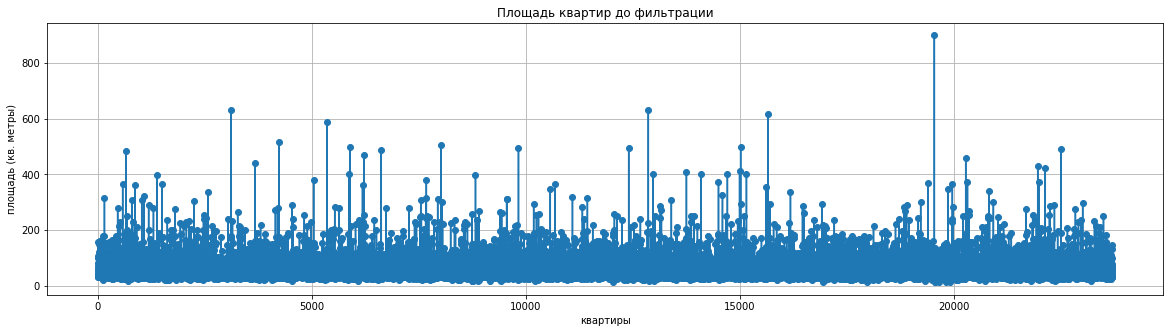


Эмпирическим путем принимаю волевое решение почикать все квартиры с площадью более 200 метров



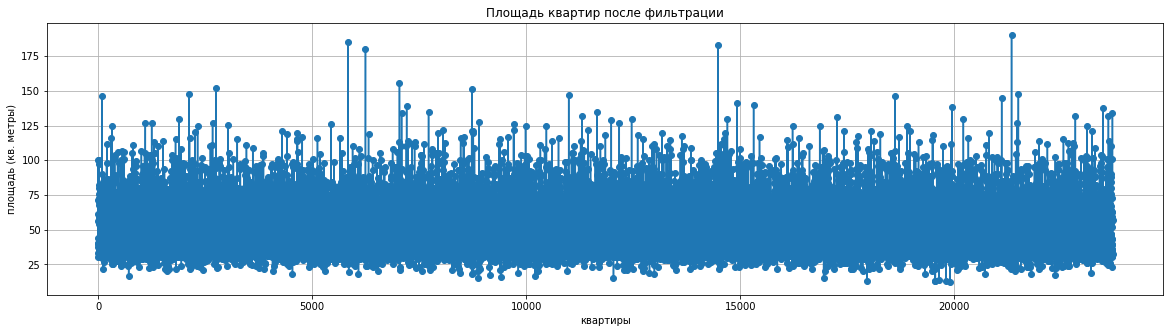

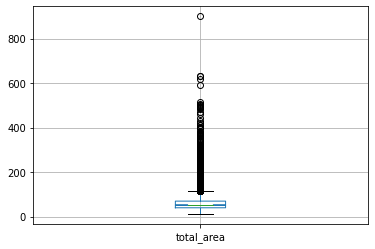

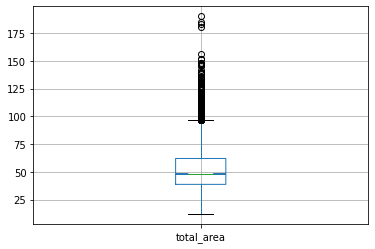

In [ ]:
print(df['total_area'].describe())
print()
df['total_area'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('Площадь квартир до фильтрации')
plt.xlabel('квартиры')
plt.ylabel('площадь (кв. метры)')
plt.show()
print()
print('Эмпирическим путем принимаю волевое решение почикать все квартиры с площадью более 200 метров')
print()
df_query['total_area'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('Площадь квартир после фильтрации')
plt.xlabel('квартиры')
plt.ylabel('площадь (кв. метры)')
plt.show()
print()
df.boxplot('total_area', notch = True)
plt.show()
print()
df_query.boxplot('total_area', notch = True)
plt.show()

### last_price

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64



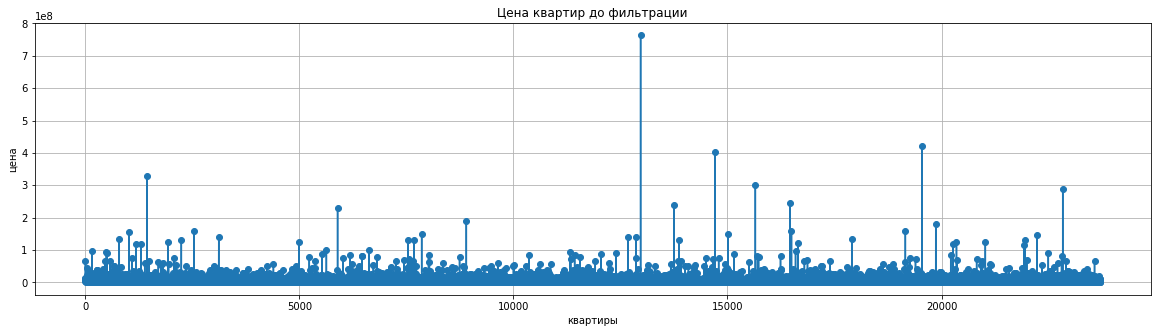


12190 - выброс. и все что больше 10 млн.



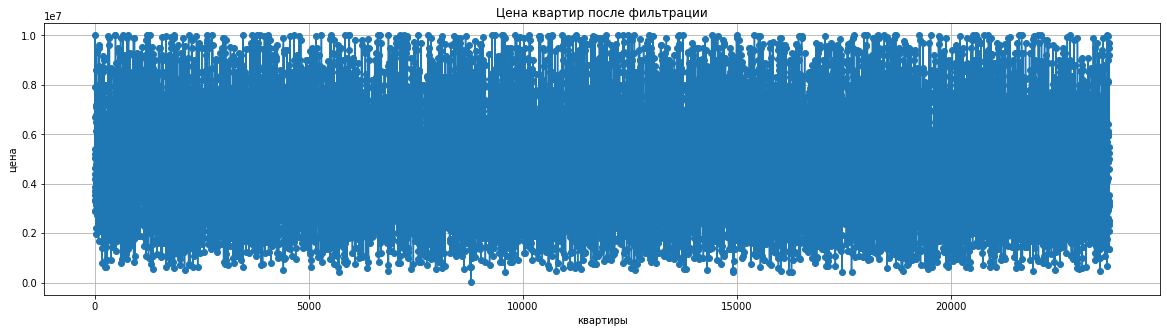

In [ ]:
print(df['last_price'].describe())
print()
df['last_price'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('Цена квартир до фильтрации')
plt.xlabel('квартиры')
plt.ylabel('цена')
plt.show()
print()
print('12190 - выброс. и все что больше 10 млн.')
print()
df_query['last_price'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('Цена квартир после фильтрации')
plt.xlabel('квартиры')
plt.ylabel('цена')
plt.show()

### rooms

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64



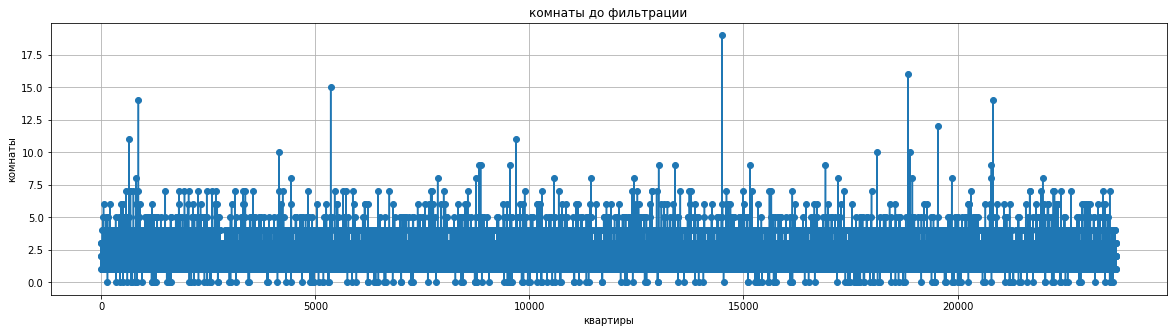


отфильтрую 6ти комнатные квартиры



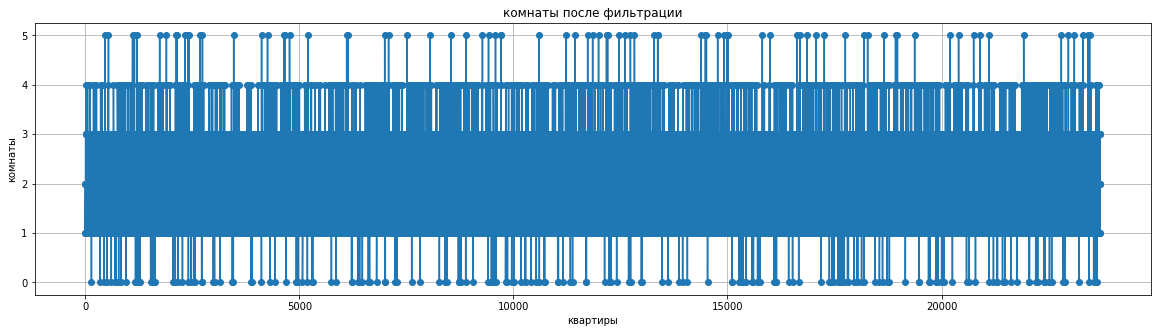

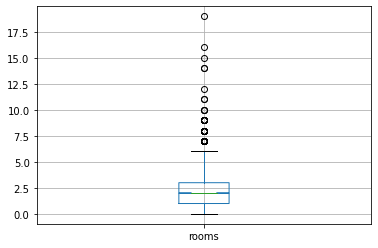

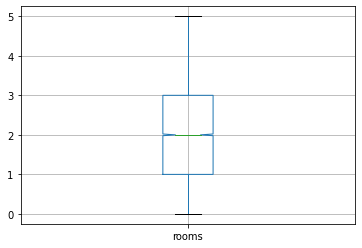

In [ ]:
print(df['rooms'].describe())
print()
df['rooms'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('комнаты до фильтрации')
plt.xlabel('квартиры')
plt.ylabel('комнаты')
plt.show()
print()
print('отфильтрую 6ти комнатные квартиры')
print()
df_query['rooms'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('комнаты после фильтрации')
plt.xlabel('квартиры')
plt.ylabel('комнаты')
plt.show()
print()
df.boxplot('rooms', notch = True)
plt.show()
print()
df_query.boxplot('rooms', notch = True)
plt.show()

### ceiling_height

count    23621.000000
mean         2.735933
std          0.995903
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64



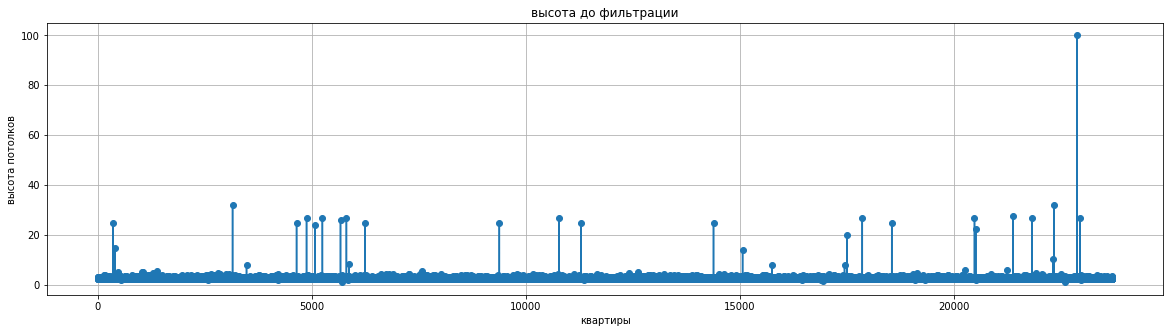


отфильтрую потолки выше 5 и меньше 2х метров



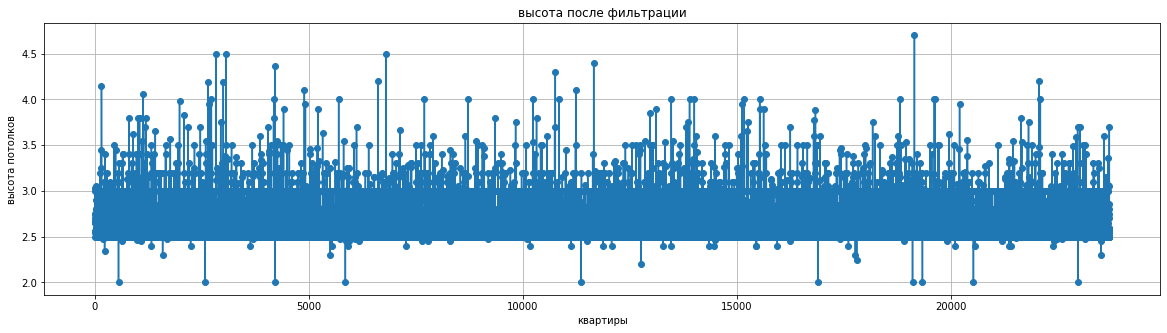

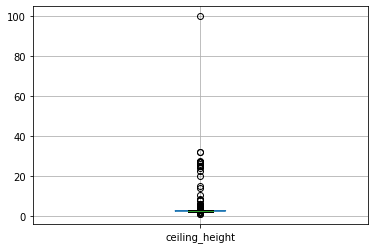

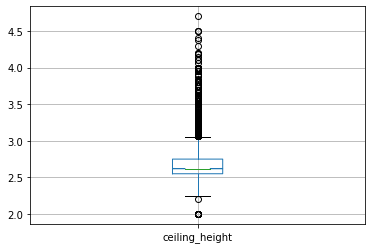

In [ ]:
print(df['ceiling_height'].describe())
print()
df['ceiling_height'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('высота до фильтрации')
plt.xlabel('квартиры')
plt.ylabel('высота потолков')
plt.show()
print()
print('отфильтрую потолки выше 5 и меньше 2х метров')
print()
df_query['ceiling_height'].plot(grid=True, style='o-', figsize=(20, 5))
plt.title('высота после фильтрации')
plt.xlabel('квартиры')
plt.ylabel('высота потолков')
plt.show()
print()
df.boxplot('ceiling_height', notch = True)
plt.show()
print()
df_query.boxplot('ceiling_height', notch = True)
plt.show()

### Результат

In [ ]:
print(
    'Почикано {0:.0%}'.format(
        1 - (df_query.count()[0] / data.count()[0])
        ), 'исходных данных'
    )
print()
print(
    'Осталось {0:.0%}'.format(
        1 - (1 - (df_query.count()[0] / data.count()[0]))
        ), 'данных от исходного data'
    )

Почикано 12% исходных данных

Осталось 88% данных от исходного data


In [ ]:
### Изучите, зависит ли цена от площади, числа комнат, удалённости от центра

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

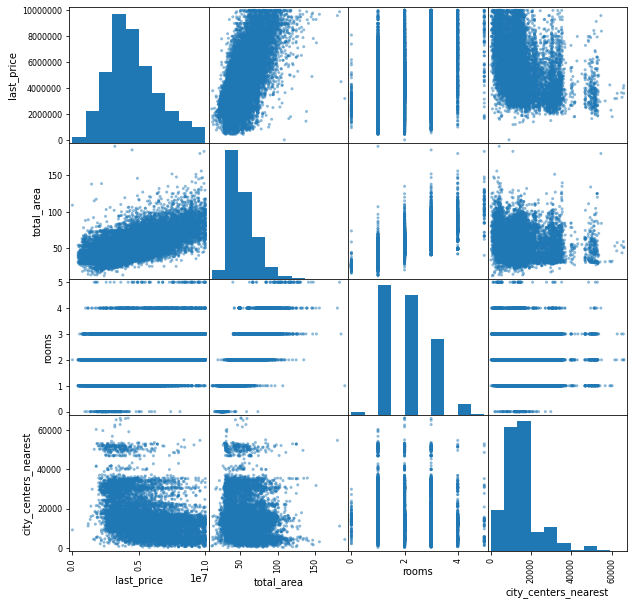

In [ ]:
pd.plotting.scatter_matrix(df_query.loc[:, ['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(10, 10))

- цена в основном от 2,5 млн
- площадь от 20
- конматы в основном 1,2,3. чуть меньше 4. редко 0(маленькие студии) и 5
- в основном все квартиры находятся на расстоянии 20 км от центра

In [ ]:
print(df_query.loc[:, ['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr())
print()
print('Наибольшая корреяция у общей площади и числа комнат.\nМеньше всего зависят друг от друга комнаты и расстояние до центра')

                      last_price  total_area     rooms  city_centers_nearest
last_price              1.000000    0.660516  0.429717             -0.331968
total_area              0.660516    1.000000  0.803779             -0.086921
rooms                   0.429717    0.803779  1.000000             -0.052662
city_centers_nearest   -0.331968   -0.086921 -0.052662              1.000000

Наибольшая корреяция у общей площади и числа комнат.
Меньше всего зависят друг от друга комнаты и расстояние до центра


### Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [ ]:
print('Топ 10 городов по количству объявлений:')
print()
print(df_query['locality_name_unify'].value_counts().sort_values(ascending=False).head(10))

Топ 10 городов по количству объявлений:

санкт-петербург    13028
мурино               584
кудрово              466
шушары               437
всеволожск           394
колпино              336
пушкин               330
парголово            326
гатчина              304
выборг               236
Name: locality_name_unify, dtype: int64


### Выделите населённые пункты с самой высокой и низкой стоимостью 

In [ ]:
top_locality_query = df_query.pivot_table(
        index=['locality_name_unify', 'locality_name'],
        values='price_square_meter',
        aggfunc='mean'
        )

top_locality_query['price_square_meter'] = top_locality_query['price_square_meter'].round(1)

print(top_locality_query.sort_values(by='price_square_meter', ascending=False))

                                           price_square_meter
locality_name_unify locality_name                            
лисий нос           посёлок Лисий Нос                121616.2
санкт-петербург     Санкт-Петербург                  104378.3
пушкин              Пушкин                           100061.5
кудрово             Кудрово                           99546.9
сестрорецк          Сестрорецк                        98604.2
...                                                       ...
совхозный           поселок Совхозный                 12629.2
выскатка            деревня Выскатка                  12335.4
вахнова кара        деревня Вахнова Кара              11688.3
станции свирь       посёлок станции Свирь             11481.5
старополье          деревня Старополье                11206.2

[362 rows x 1 columns]


In [ ]:
display(df.query('locality_name_unify == "лисий нос"'))

,total_images,last_price,price_square_meter,total_area,living_area,kitchen_area,share_living_space,share_kitchen_area,first_day_exposition,day_week,...,open_plan,balcony,locality_name,locality_name_unify,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
6361,4,2350000.0,58750.0,40.0,28.0,5.5,0.7,0.1,2017-02-08,Wednesday,...,False,0,поселок Лисий Нос,лисий нос,55930.0,28246.0,0.0,NaN,0.0,NaN
12047,8,2750000.0,74525.7,36.9,19.0,8.5,0.5,0.2,2015-05-13,Wednesday,...,False,0,посёлок Лисий Нос,лисий нос,55909.0,28226.0,0.0,NaN,0.0,NaN
21934,3,7305000.0,168706.7,43.3,NaN,9.9,NaN,0.2,2018-10-09,Tuesday,...,False,0,посёлок Лисий Нос,лисий нос,54068.0,26368.0,0.0,NaN,0.0,NaN


<div class="alert alert-info">
<b>Комментарий:</b>
<br>по лисьему носу всего 3 объявления, и в стрчке с индексом 21934 слишком большая цена. Возможно, что там золотые туалеты. Нужно посмотреть фотографии в объявлении. Возможно - жадность. Нужно посмотреть в глаза продавца. Возможно опечатка, но сомниевась.
    
Исключать из рейтинга это объявление нельзя, так как мы не можем проверить мои гипотезы. В противном случае - это будет манипуляция статистикой. Поэтому, в какой-то мере когда я срезал 90% всех данных, то получил более правдивую картину. 
    
Возможно самым верным решением будет сравнение трех разных срезов: (0-q1; q1-q2; q3-100)
</div>

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.

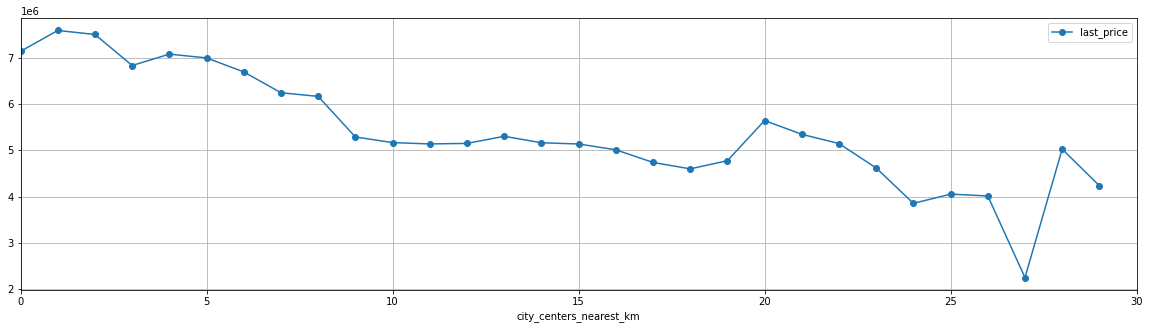

6 км радиус


In [ ]:
df_query['city_centers_nearest_km'] = (df_query['city_centers_nearest'] / 1000).round(0)

(
    df_query.query('locality_name_unify == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(20, 5))
)
plt.show()

print('6 км радиус')

## Выделите сегмент квартир в центре.


In [ ]:
piter_centr = df_query.query(('locality_name_unify == "санкт-петербург"') and ('city_centers_nearest_km <= 6'))

### Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

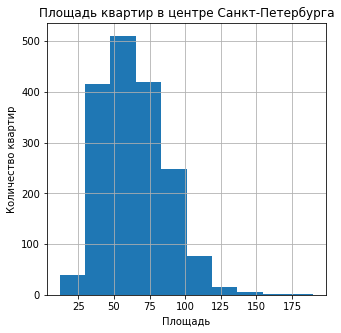

count    1733.000000
mean       64.322308
std        22.241560
min        12.000000
25%        47.000000
50%        62.000000
75%        79.000000
max       190.000000
Name: total_area, dtype: float64


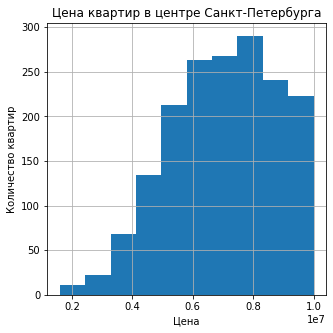

count    1.733000e+03
mean     7.005989e+06
std      1.770592e+06
min      1.600000e+06
25%      5.700000e+06
50%      7.000000e+06
75%      8.484000e+06
max      1.000000e+07
Name: last_price, dtype: float64


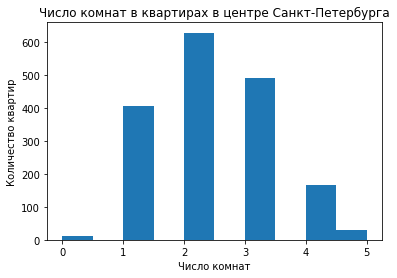

count    1733.000000
mean        2.278130
std         1.001137
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


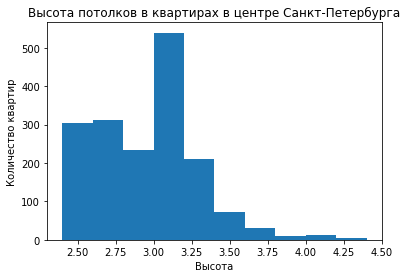

count    1733.000000
mean        2.931985
std         0.319632
min         2.400000
25%         2.700000
50%         3.000000
75%         3.100000
max         4.400000
Name: ceiling_height, dtype: float64


In [ ]:
piter_centr['total_area'].hist(
    range=(piter_centr['total_area'].min(), piter_centr['total_area'].max()),
    figsize = (5,5)
    )
plt.title('Площадь квартир в центре Санкт-Петербурга')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()
print(piter_centr['total_area'].describe())

piter_centr['last_price'].hist(
    range=(piter_centr['last_price'].min(), piter_centr['last_price'].max()),
    figsize = (5,5)
    )
plt.title('Цена квартир в центре Санкт-Петербурга')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print(piter_centr['last_price'].describe())

plt.hist(
    piter_centr['rooms'],
    range=(piter_centr['rooms'].min(), piter_centr['rooms'].max())
    )
plt.title('Число комнат в квартирах в центре Санкт-Петербурга')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()
print(piter_centr['rooms'].describe())

plt.hist(
    piter_centr['ceiling_height'],
    range=(piter_centr['ceiling_height'].min(), piter_centr['ceiling_height'].max())
    )
plt.title('Высота потолков в квартирах в центре Санкт-Петербурга')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()
print(piter_centr['ceiling_height'].describe())

<div class="alert alert-info">
<b>Комментарий:</b>
<br>
Площадь квртир в центре СПб в основном от 30 до 80 кв. метров. Самая маленькая    квартира имеет площадь 12 метров, самая большая 190. 75% квартир в объявлении имеют площадь до 79 кв. метров. Медианная площадь 62 метра.
    
Цены от 1.6 до 10 млн. рублей. Медиана 7 млн. рублей. 
    
Количество комнат: есть все варианты. Можно найти маленькую студию (но их мало). Основная масса квартир имеет 2 комнаты. Шанс найти 5 комнатную квартиру практически такой же (но чуть больше) как и малекую студию
</div>

### Выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Text(0.5, 1.0, 'Корреляция зависимости параметров недвижимости\nCегмент квартир в центре Санкт-Петербурга')

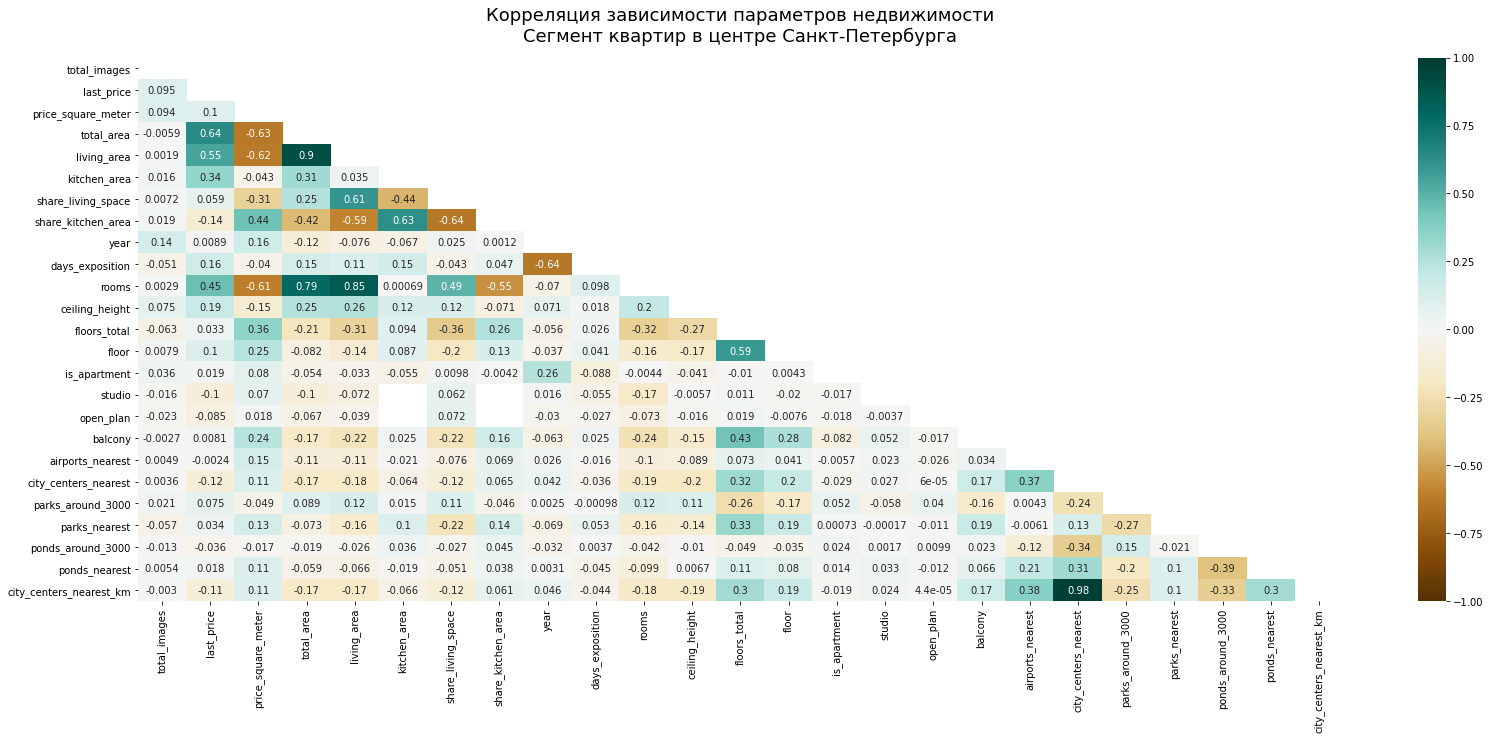

In [ ]:
plt.figure(figsize=(27, 10)) 

mask = np.triu(np.ones_like(piter_centr.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(piter_centr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 

heatmap.set_title('Корреляция зависимости параметров недвижимости\nCегмент квартир в центре Санкт-Петербурга', fontdict={'fontsize':18}, pad=16)

### Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Text(0.5, 1.0, 'Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области')

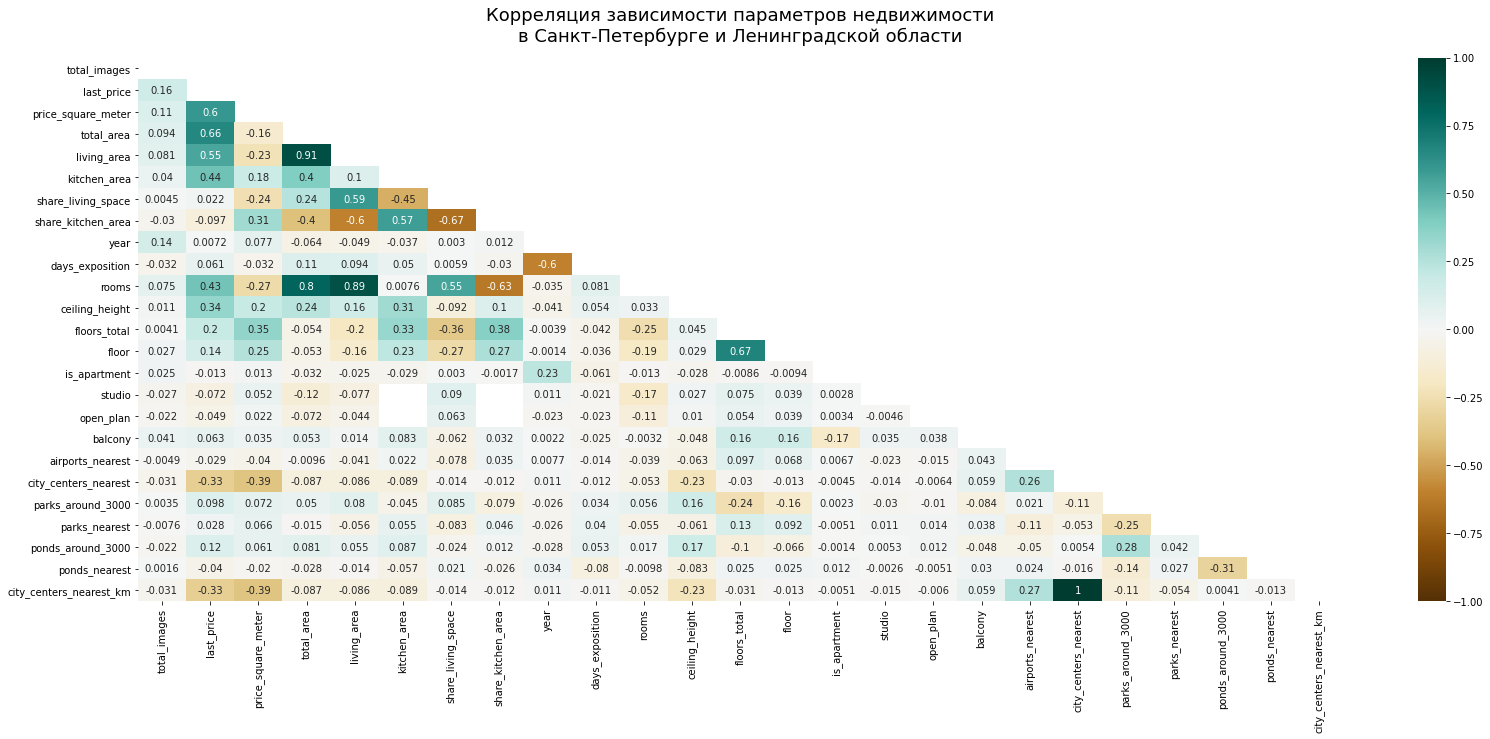

In [ ]:
plt.figure(figsize=(27, 10)) 

mask = np.triu(np.ones_like(df_query.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df_query.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области', fontdict={'fontsize':18}, pad=16)

In [ ]:
df_query.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.660516,0.803779,0.239766
last_price,0.660516,1.000000,0.429717,0.343646
rooms,0.803779,0.429717,1.000000,0.033268
ceiling_height,0.239766,0.343646,0.033268,1.000000


Text(0.5, 1.0, 'Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области')

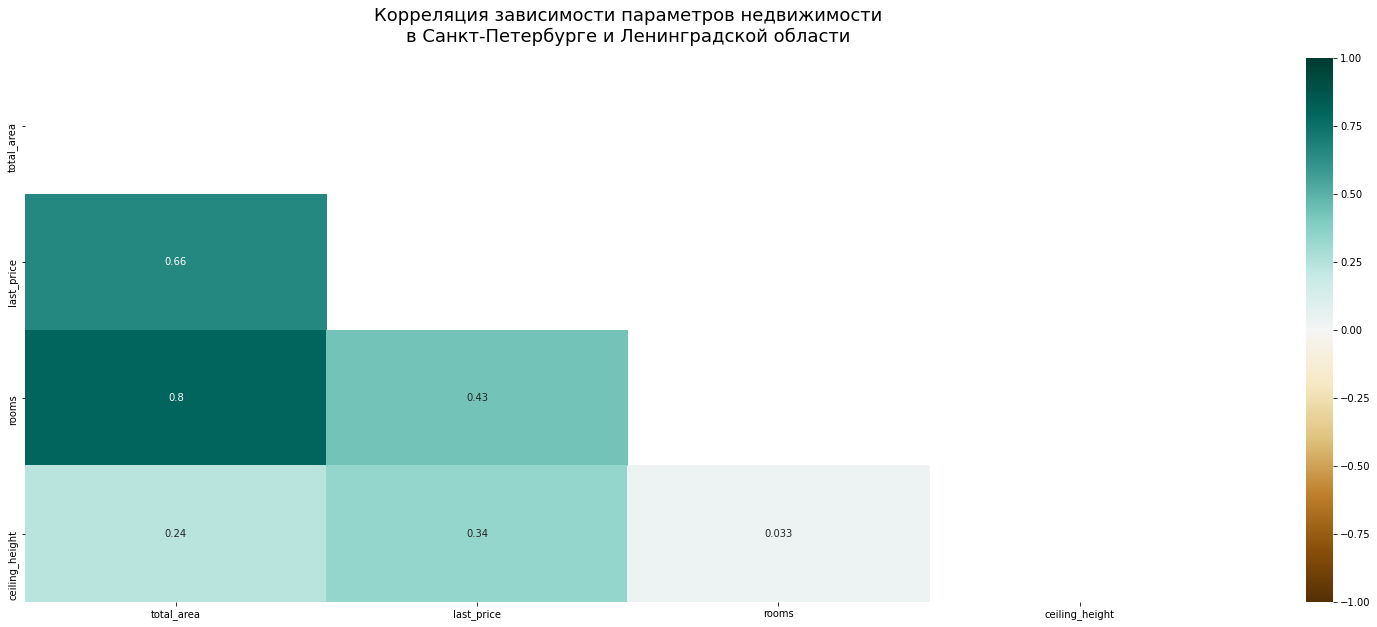

In [ ]:
plt.figure(figsize=(27, 10)) 

mask = np.triu(np.ones_like(
    df_query.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].corr(), 
    dtype=np.bool)
              ) 

heatmap = sns.heatmap(
    df_query.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].corr(), 
    mask=mask, 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap='BrBG'
) 
heatmap.set_title(
    'Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области',
    fontdict={'fontsize':18}, 
    pad=16
)

Text(0.5, 1.0, 'Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области')

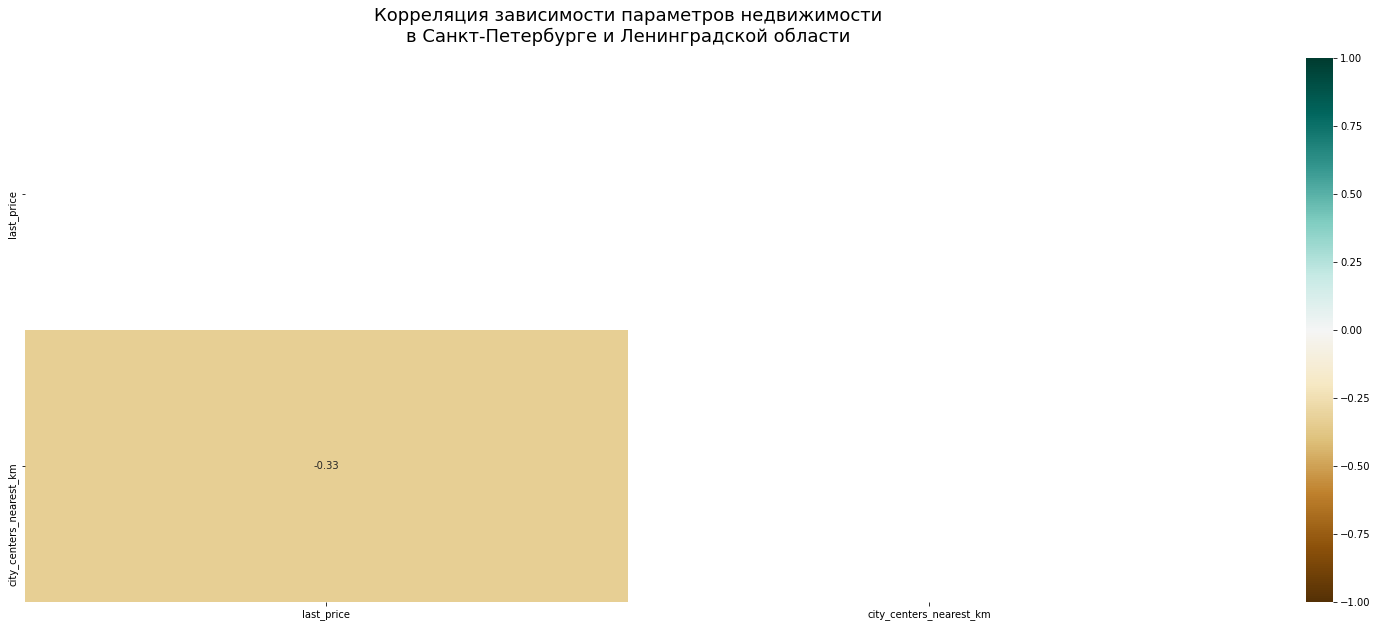

In [ ]:
#df_query.loc[:, ['last_price', 'city_centers_nearest_km']].corr()

plt.figure(figsize=(27, 10)) 

mask = np.triu(np.ones_like(
    df_query.loc[:, ['last_price', 'city_centers_nearest_km']].corr(), 
    dtype=np.bool)
              ) 

heatmap = sns.heatmap(
    df_query.loc[:, ['last_price', 'city_centers_nearest_km']].corr(), 
    mask=mask, 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap='BrBG'
) 
heatmap.set_title(
    'Корреляция зависимости параметров недвижимости\nв Санкт-Петербурге и Ленинградской области',
    fontdict={'fontsize':18}, 
    pad=16
)

<div class="alert alert-info">
<b>Комментарий:</b>
<br> Бинго!
Отрицательная корреляция. Чем больше один параметр, тем меньше другой и наоборот.

Чем ближе к центру - тем дороже, чем дальше - дешевле

# Общий вывод

<div class="alert alert-info">
<b>Комментарий:</b>
<br>
Работа с проектом помогла мне разобраться с многими пробелами в знаниях, чтении графиков и работы разных методов.

В части предобработки данных я скорректировал названия столбцов, унифицировал названия населенных пунктов и привел данные к необходимым типам. 

Мной было принято решение не избавляться от аномальных данных и пропусков на этом этапе.
Единственное, я решил заменить на медиану высоту потолков в квартирах опираясь на этажность дома.  Так как большинство домов имеют типовое строение, то можно сказать. 

При использовании метода query в фильтрации, я принял решение ограничить рамки строго по значениям первой и третьей квантилей.
Из-за этого мой датафрейм уменьшился практически в 10 раз, но все вбросы были отфильтрованы и конечные выводы более точно описываю ситуацию на рынке недвижимости Санкт-Петербурга в 2015 - 2019 годах
</div>


# Общий вывод v2

<div class="alert alert-info">
<b>Комментарий:</b>
<br>
Это кошмар. Я думал, что я красавчик и очень круто придумал фильтровать данные по квартилям. Но, видимо, нет.
    Формально, я понимаю, что сделал правильно первый вариант фильтрации, так как избавился от выбросов практически на 100%. Но есть много но)
    
    
В предобработке я мало работал с заполнением пропусков, так как считаю, что это может сильно исказить данные.
    
Так же для построения более точных выводов связей мне не хватает метрик по качеству ремонта, вторичка или новое жилье, я видел объявления, в которых делают акцент на хороших соседей и тихий двор, что наверняка повышает стоимоть недвижимости (по крайней мере в голове продовца)

Я смягчил рамки фильтрации. Теперь удалось сохранить 88% данных
    
в центре Питера в основном:
    - площадь от 30 до 100 м. кв.
    - цена от 4 до 10 млн
    - комнаты 1,2,3
    - потолки в основном от 3 метров
    
Связи +- такие же 
    

    
    
</div>

# Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод